### Evaluating a Hypothesis

Once we have done some trouble shooting for errors in our predictions by: 
- Getting more training examples
- Trying smaller sets of features
- Trying additional features
- Trying polynomial features
- Increasing or decreasing λ

We can move on to evaluating our new hypothesis.

A hypothesis may have a low error for the training data but still be inaccurate, due to overfitting. One way to evaluate a hypothesis, given a dataset of training examples, is to split the data up into two sets: a training set and a test set. Typically, the training set consists of 70% of the data and the test set is the remaining 30%. The data should be randomized so the 70% and 30% do not reflect any sort of ordering.

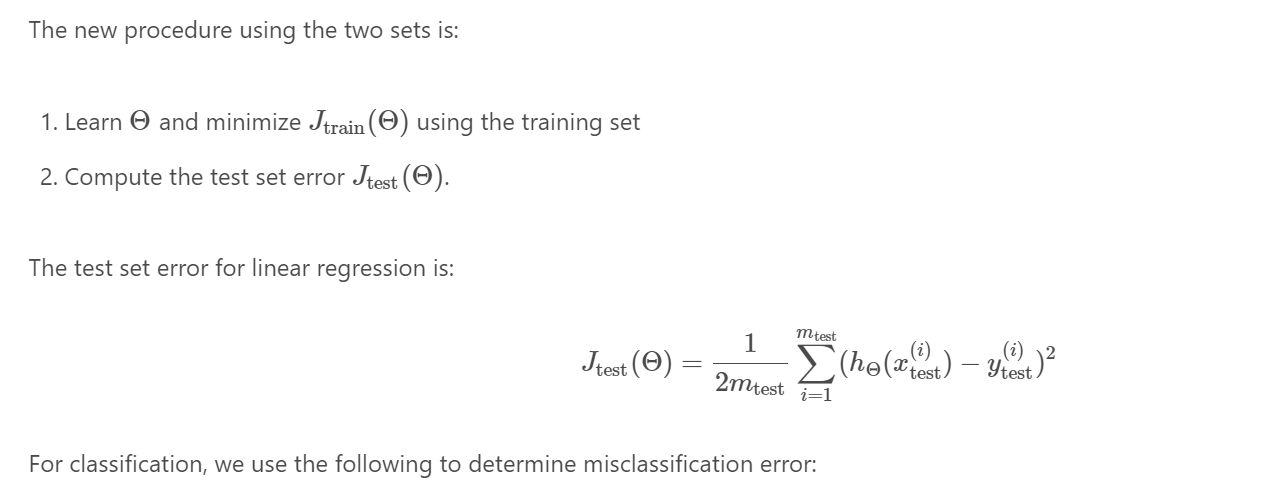

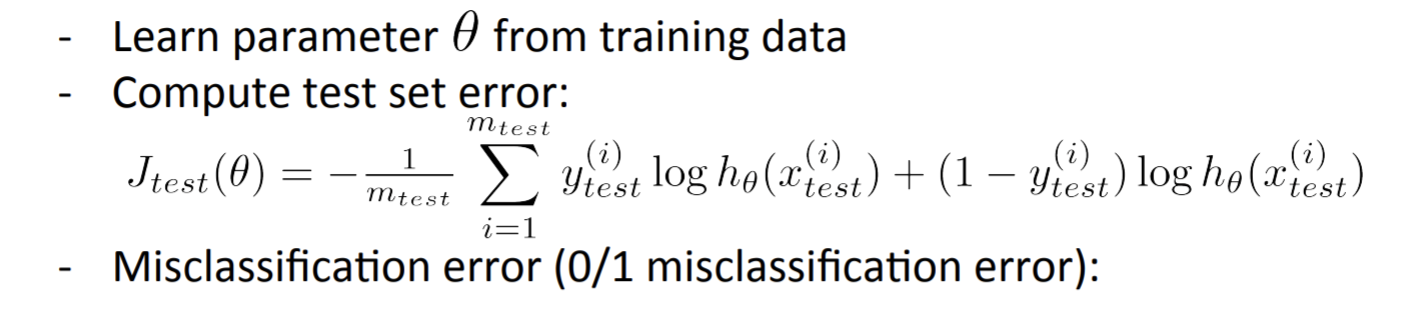

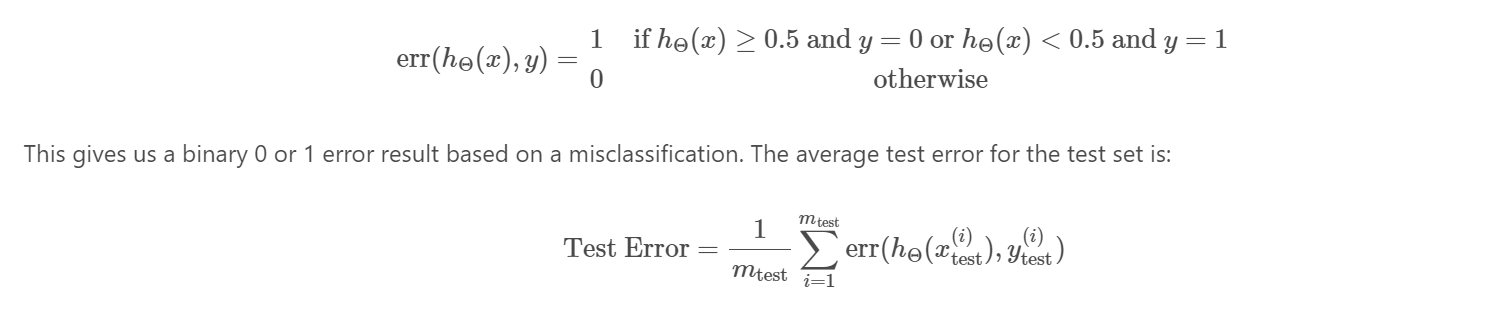

That tells us the proportion of the test data that was misclassified.

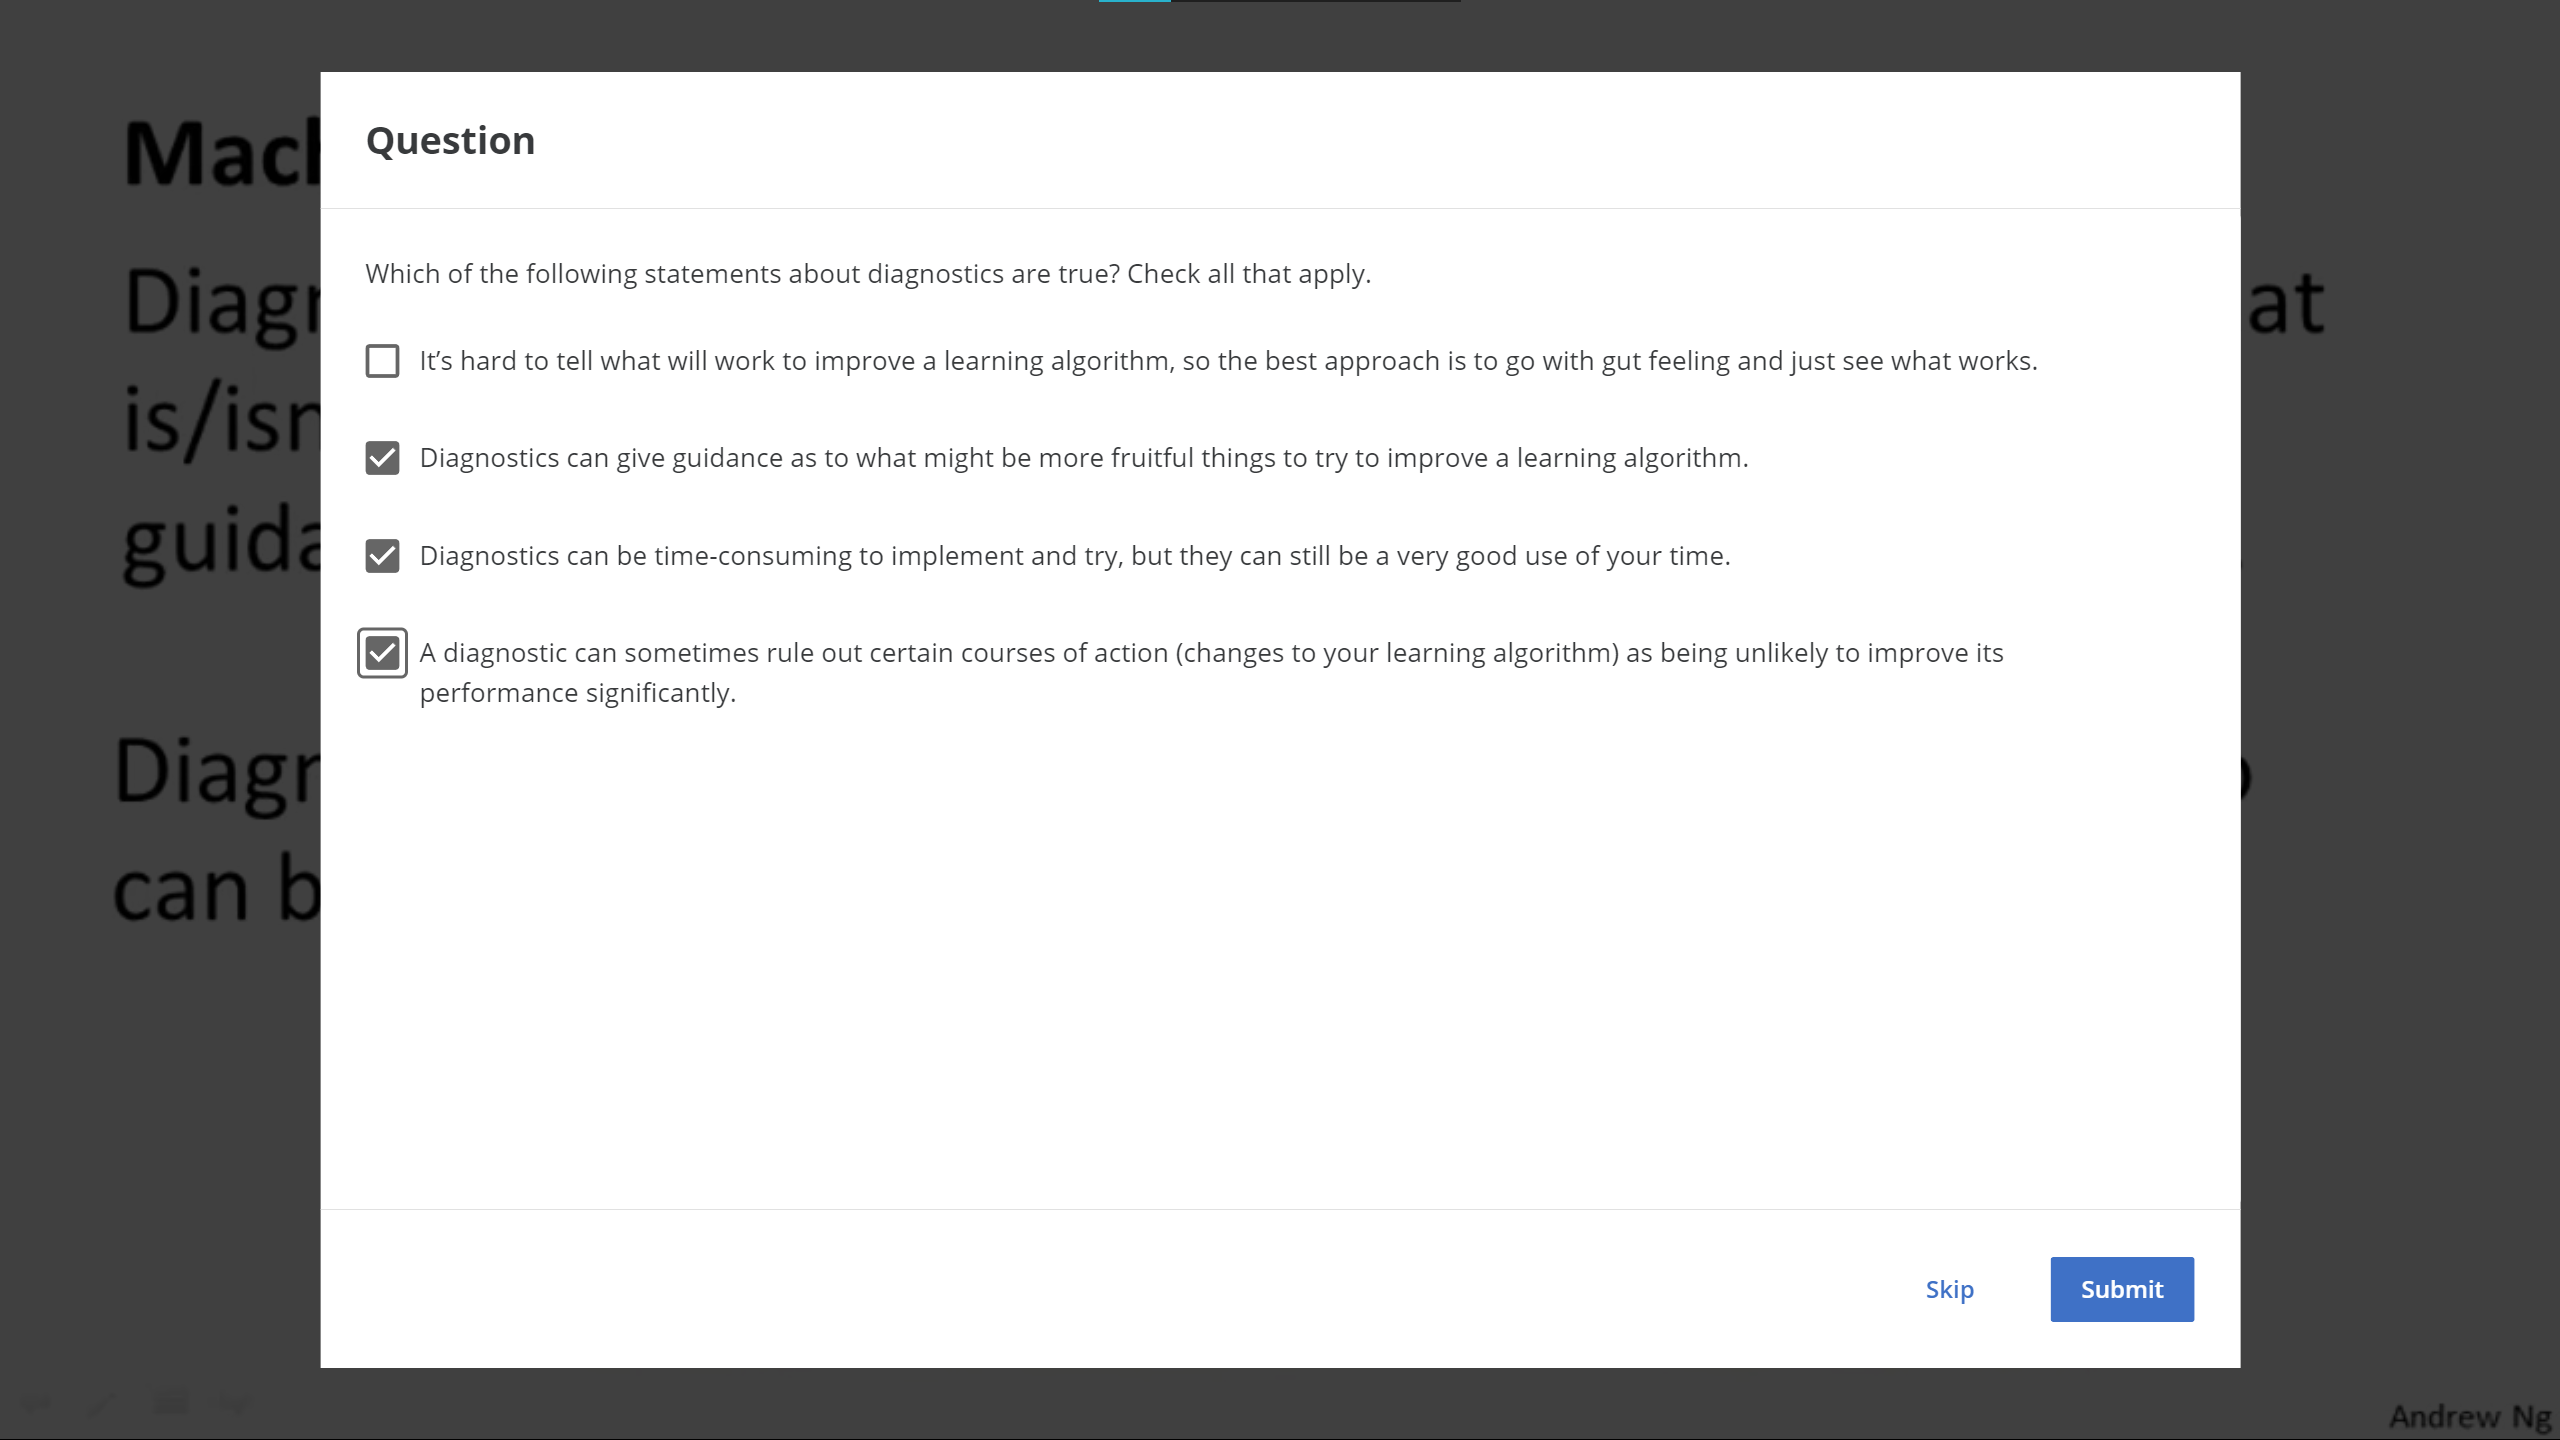

### Model Selection and Train/Validation/Test Sets

Simply because a learning algorithm fits the training set well, does not mean that it is a good hypothesis. It could over fit and as a result your predictions on the test set would be poor. The error of your hypothesis as measured on the data set with which you trained the parameters will be lower than the error on any other data set.

Given many models with different polynomial degrees, we can use a systematic approach to identify the ‘best’ function. In order to choose the model of your hypothesis, you can test each degree of polynomial and look at the error result.

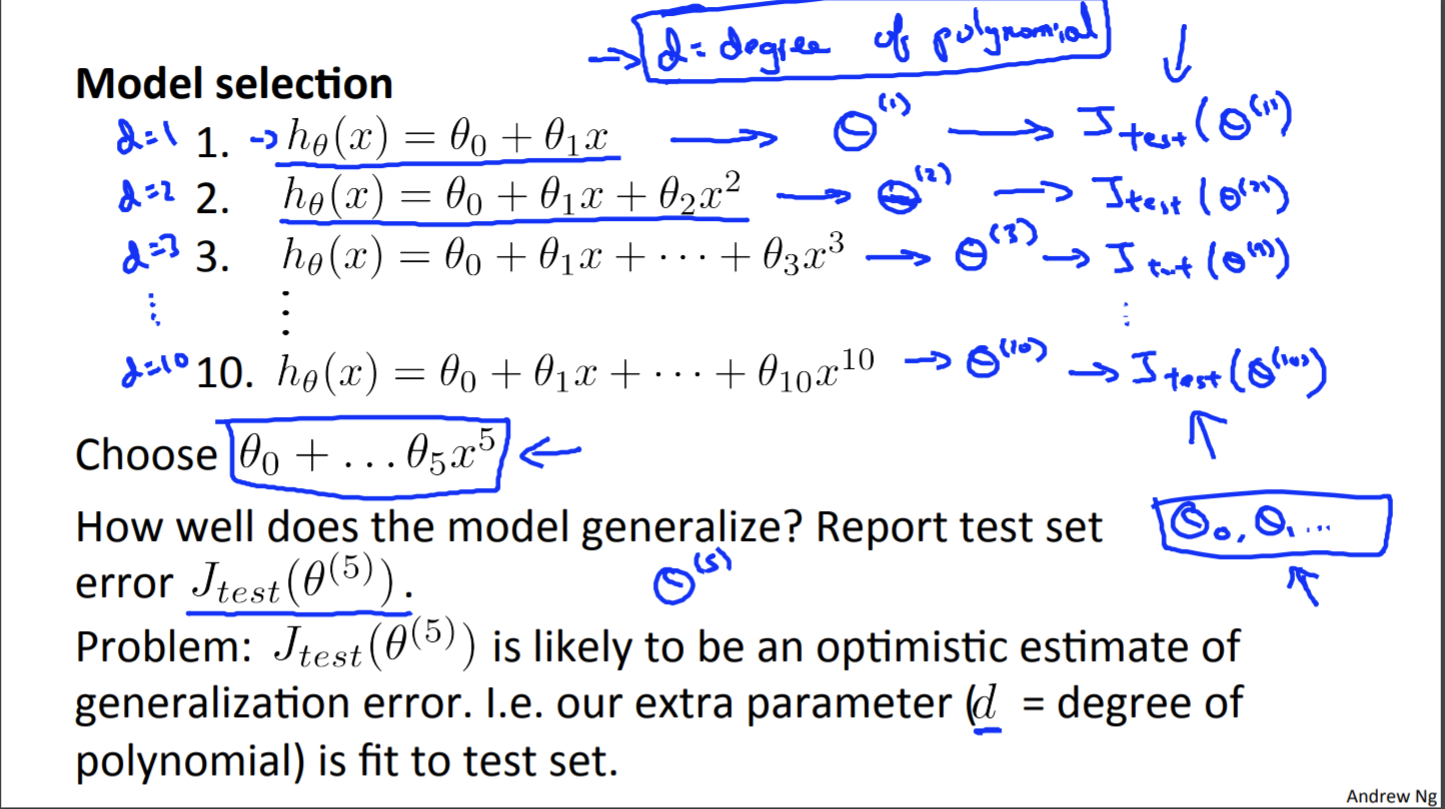

One way to partition our dataset into three sets is:

   - Training Set : 60%
   - Cross Validation Set: 20%
   - Test Set: 20%
   
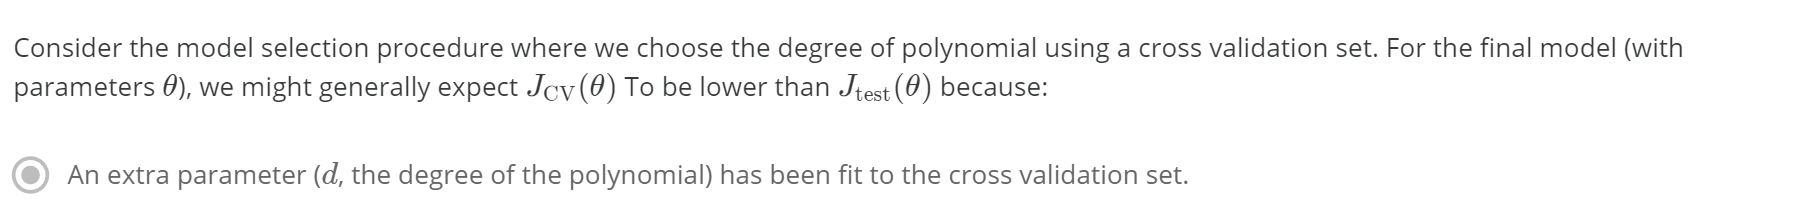   
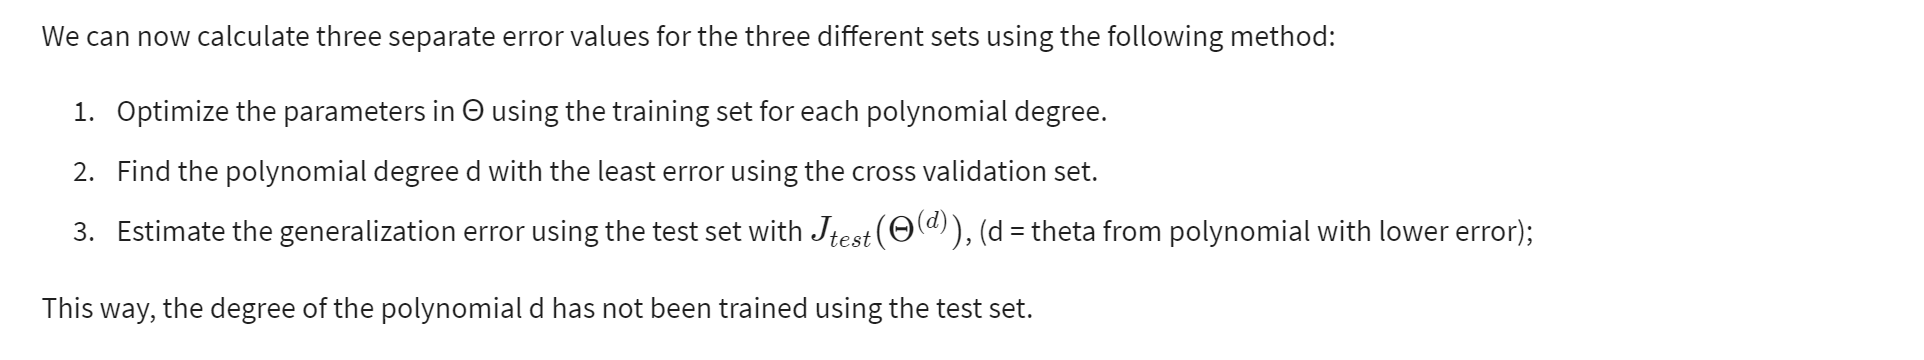

### Diagnosing Bias versus Variance

In this section, we examine the relationship between the degree of the polynomial d and the underfitting or the overfitting of our hypothesis.

- We need to distinguish whether bias or variance is the problem contributing to bad predictions.
- High bias is underfitting and high variance is overfitting. We should find a value that minimizes both.

The training error tends to decrease as we increase the degree d of the polynomial.

At the same time, the cross validation error will tend to decrease as we increase d up to a certain point, then it will increase as d increased, forming a convex curve.

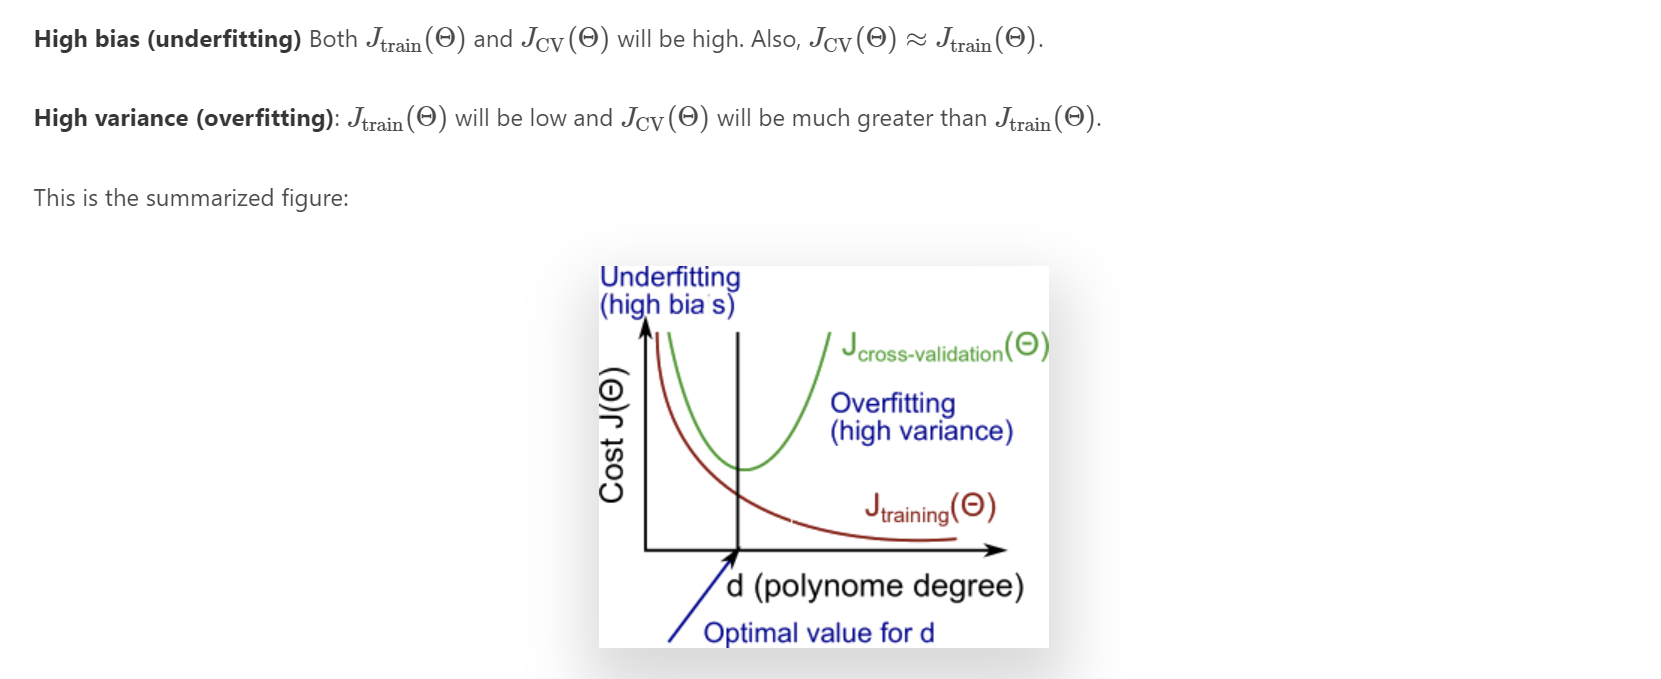

### Regularization and Bias/Variance

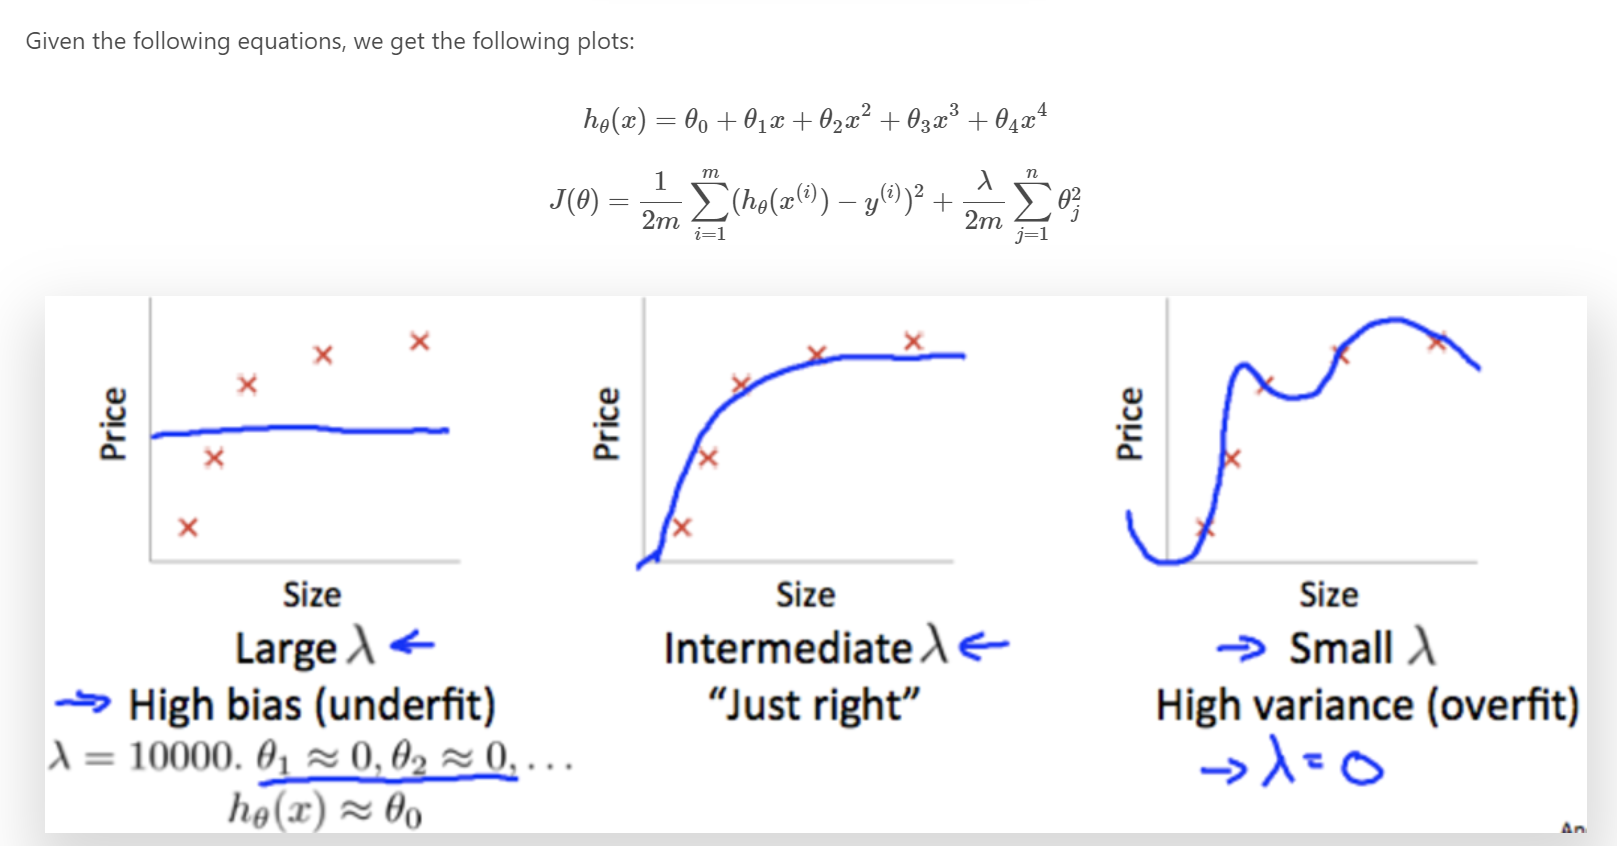

In the figure above, as λ increases, our fit becomes more rigid. On the otherhand, as λ approaches 0, we tend to overfit the data. How do we choose our parameter λ to get it ‘just right’? In order to choose the model and the regularization term λ, we need to:

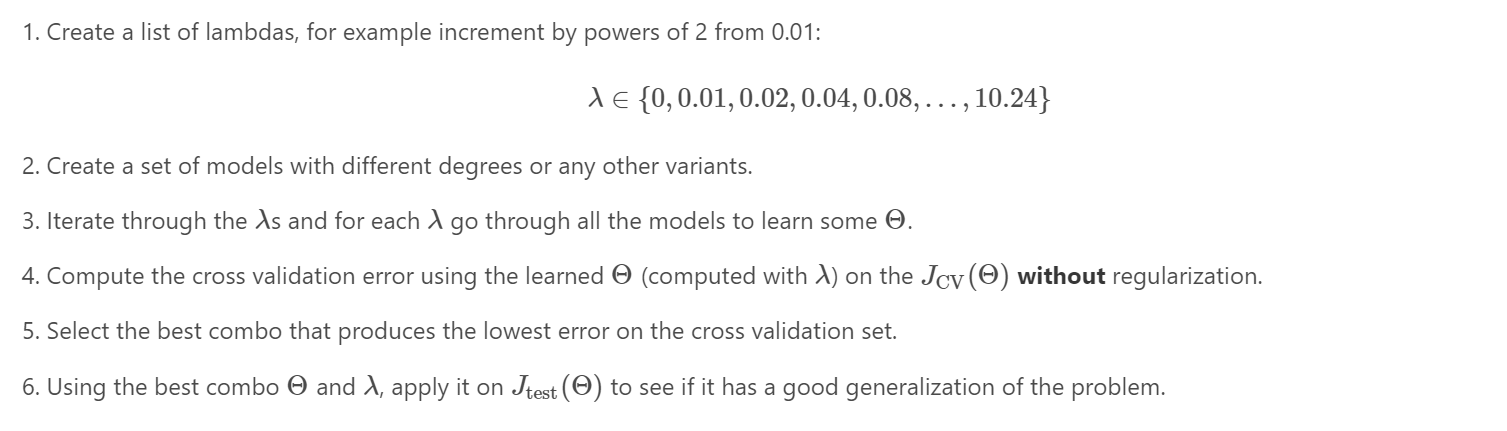

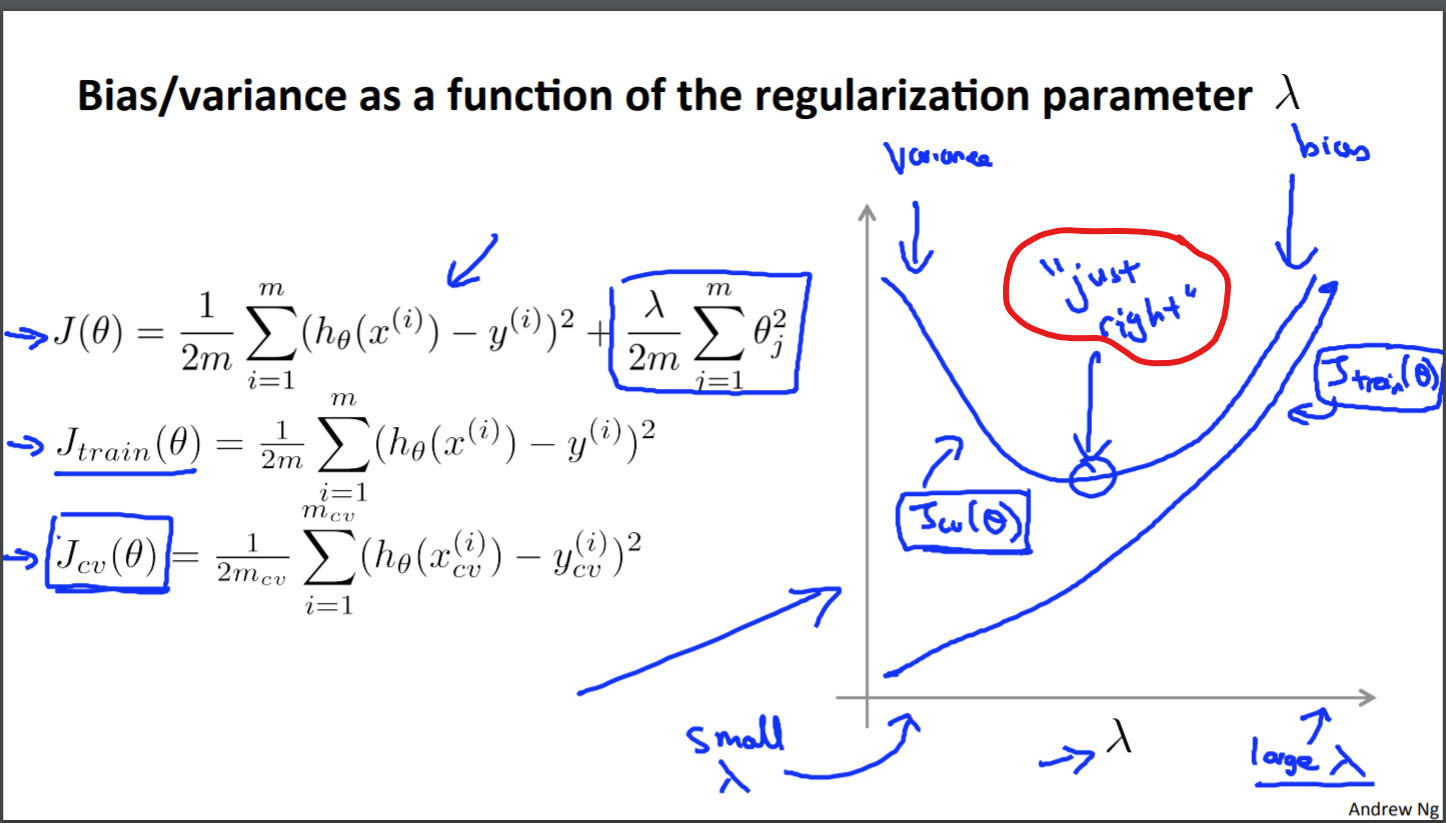

### Learning Curves

Training an algorithm on a very few number of data points will easily have 0 errors because we can always find a quadratic curve that touches exactly those number of points. Therefore:

- As the training set gets larger, the error for a quadratic function increases.
- The error value will plateau out after a certain m, or training set size.

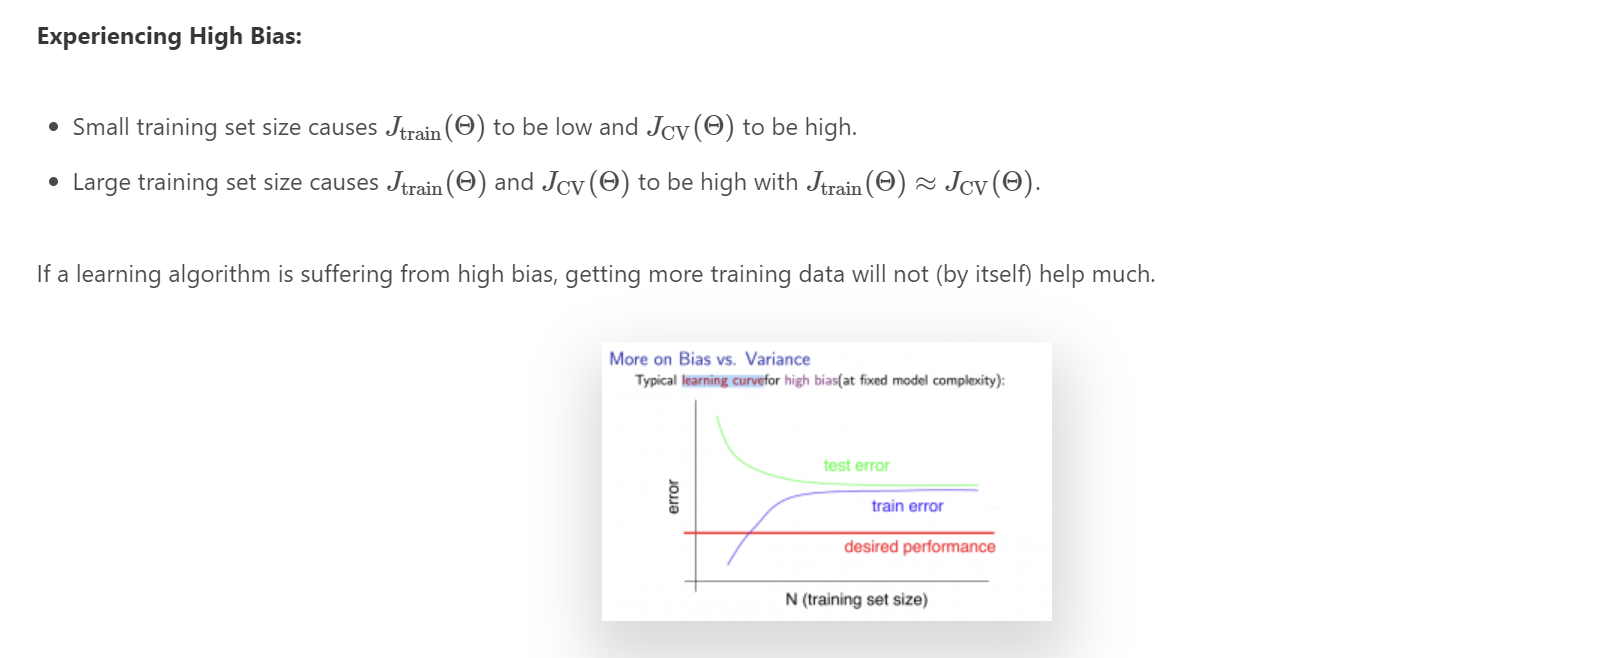

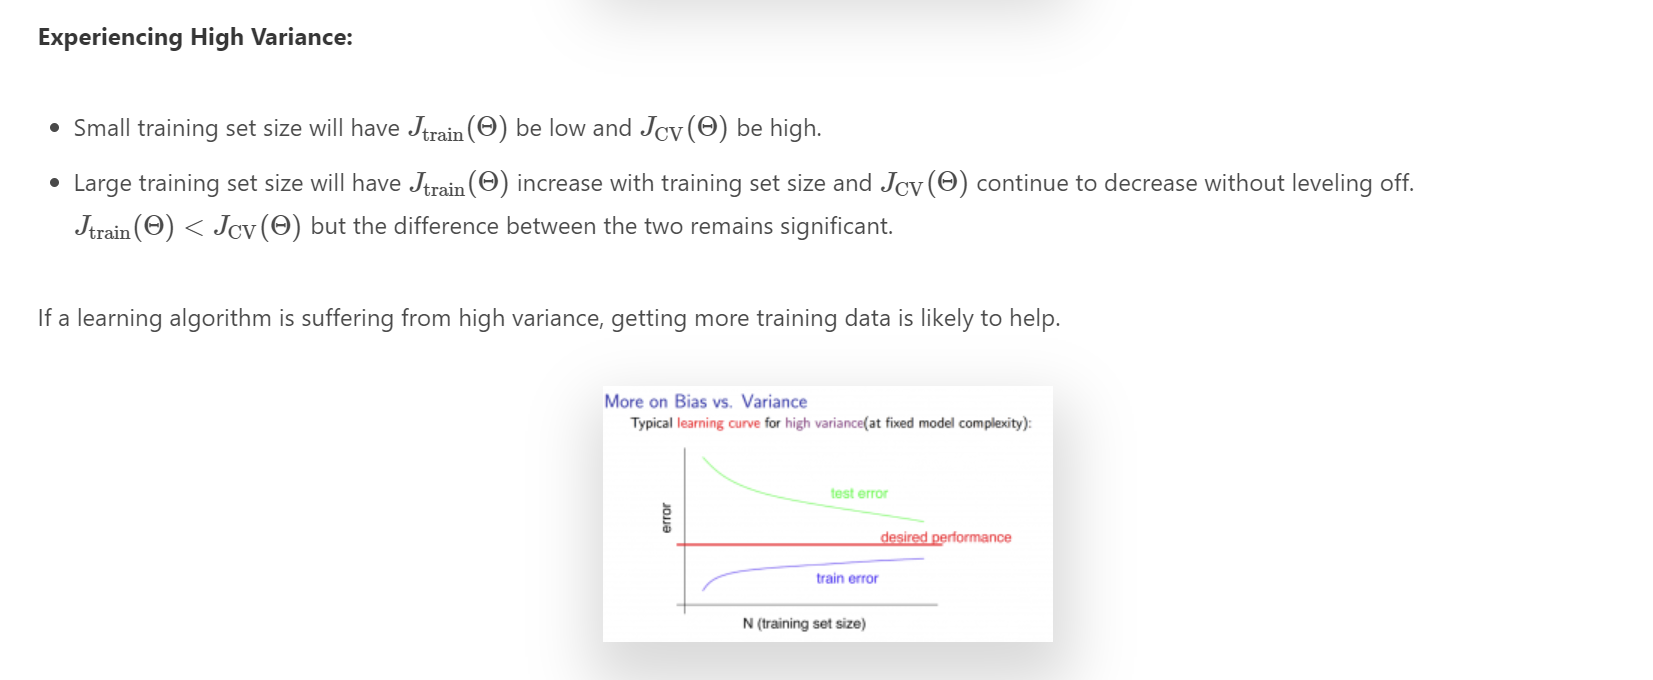

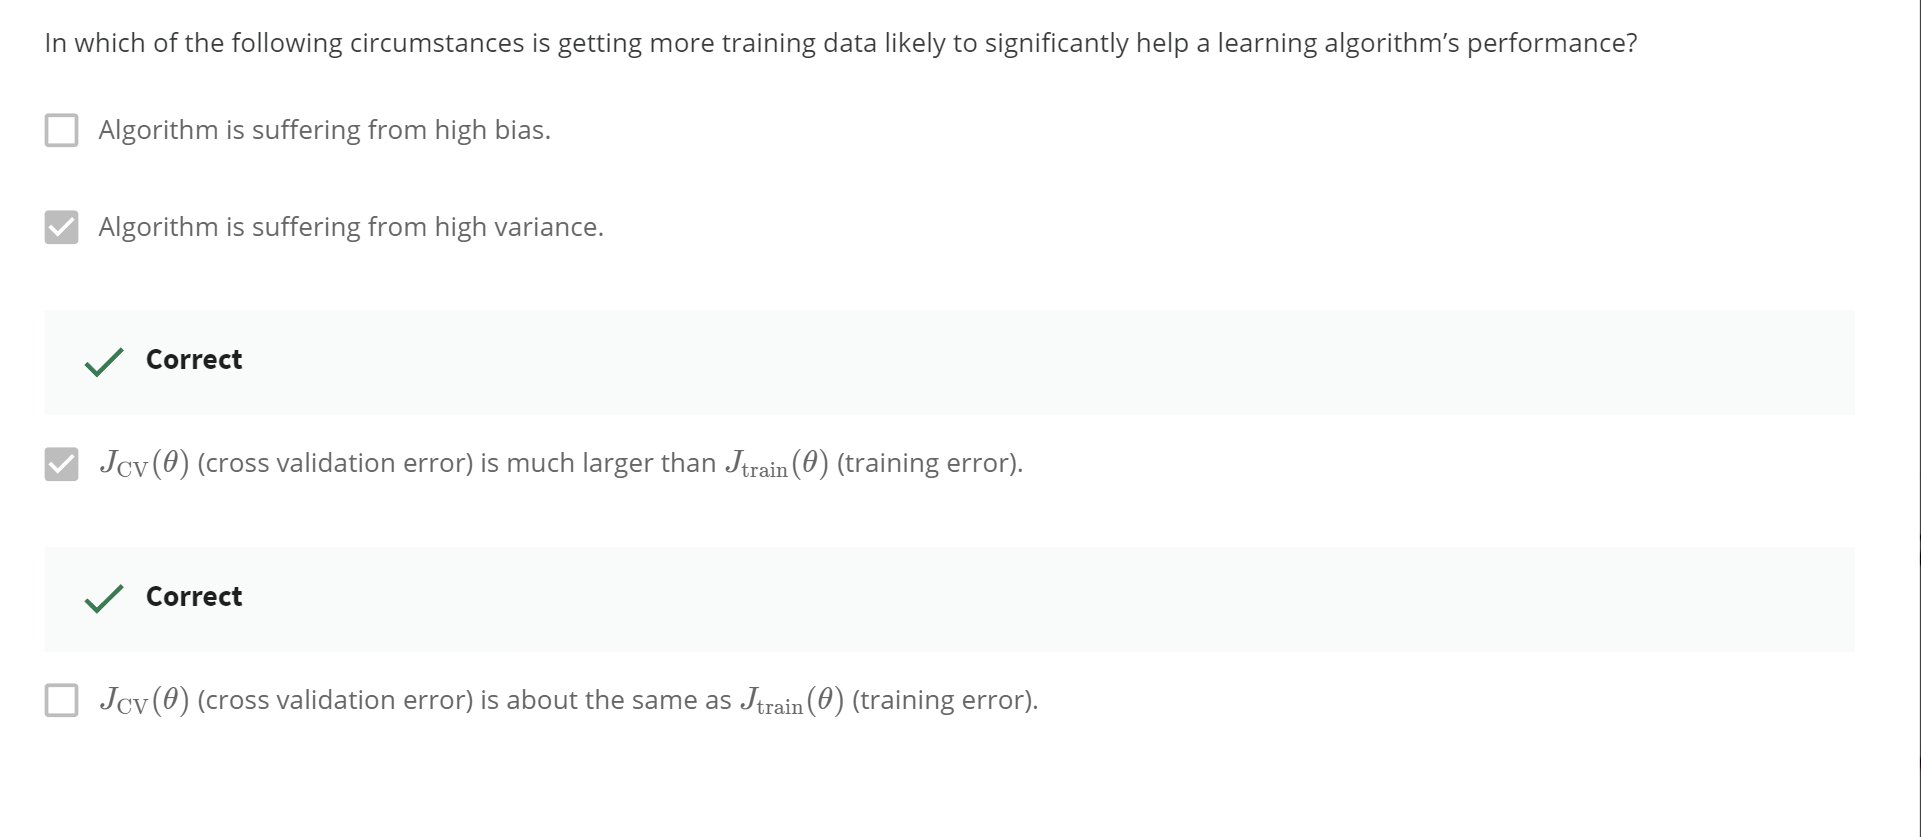

### Deciding What to Do Next

Our decision process can be broken down as follows:

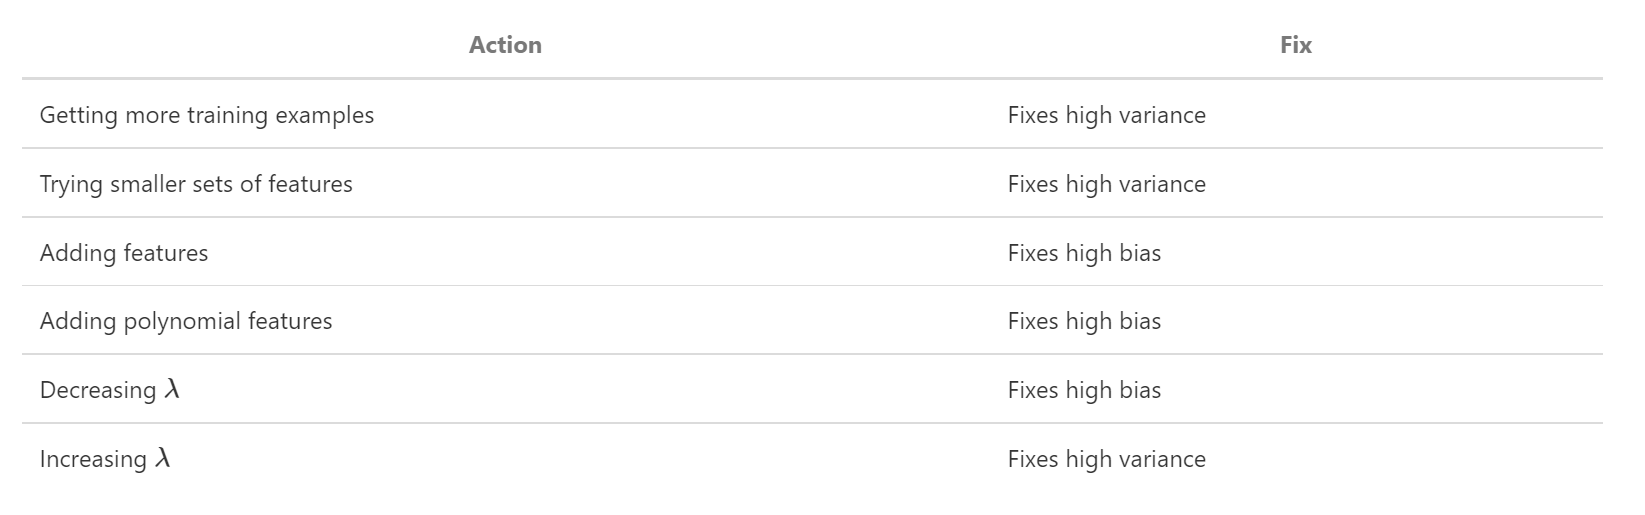

#### Diagnosing Neural Networks

- A neural network with fewer parameters is prone to underfitting. It is also computationally cheaper.
- A large neural network with more parameters is prone to overfitting. It is also computationally expensive. In this case, you can use regularization (increase λ) to address the overfitting.

Using a single hidden layer is a good starting default. You can train the neural network on a number of hidden layers using your cross validation set. You can then select the one that performs best.

#### Model Complexity Effects:

- Lower-order polynomials (lower model complexity) have high bias and low variance. In this case, the model fits poorly consistently.
- Higher-order polynomials (high model complexity) fit the training data extremely well and the test data extremely poorly. These have low bias but high variance.
- In reality, we want to choose a model in between that generalizes well and also fits the data reasonably well.

In [1]:
import utils_5

In [2]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot

# Optimization module in scipy
from scipy import optimize

# will be used to load MATLAB mat datafile format
from scipy.io import loadmat

In [8]:
def linearRegCostFunction(X, y, theta, lambda_=0.0):
    """
    Compute cost and gradient for regularized linear regression 
    with multiple variables. Computes the cost of using theta as
    the parameter for linear regression to fit the data points in X and y. 
    
    """
    # Initialize some useful values
    m = y.size # number of training examples

    # You need to return the following variables correctly 
    J = 0
    grad = np.zeros(theta.shape)
    
    # ====================== YOUR CODE HERE ======================
    h = X.dot(theta)
    J = (1 / (2 * m)) * np.sum(np.square(h - y)) + (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))
    
    grad = (1 / m) * (h - y).dot(X)
    
    grad[1:] = grad[1:] + (lambda_ / m) * theta[1:]
    # ============================================================
    return J, grad

In [9]:
def learningCurve(X, y, Xval, yval, lambda_=0):
    """
    Generates the train and cross validation set errors needed to plot a learning curve
    returns the train and cross validation set errors for a learning curve. 
    
    In this function, you will compute the train and test errors for
    dataset sizes from 1 up to m. In practice, when working with larger
    datasets, you might want to do this in larger intervals.
    
    
    Hint
    ----
    You can loop over the examples with the following:
     
           for i in range(1, m+1):
               # Compute train/cross validation errors using training examples 
               # X[:i, :] and y[:i], storing the result in 
               # error_train[i-1] and error_val[i-1]
               ....  
    """
    # Number of training examples
    m = y.size

    # You need to return these values correctly
    error_train = np.zeros(m)
    error_val   = np.zeros(m)

    # ====================== YOUR CODE HERE ======================
    for i in range(1, m + 1):
        theta_t = utils_5.trainLinearReg(linearRegCostFunction, X[:i], y[:i], lambda_ = lambda_)
        error_train[i - 1], _ = linearRegCostFunction(X[:i], y[:i], theta_t, lambda_ = 0)
        error_val[i - 1], _ = linearRegCostFunction(Xval, yval, theta_t, lambda_ = 0)
        
    # =============================================================
    return error_train, error_val

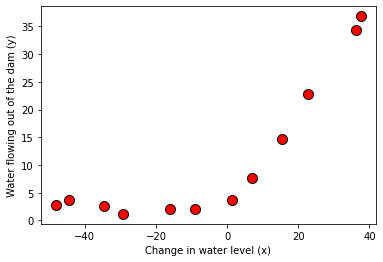

In [10]:
# Load from ex5data1.mat, where all variables will be store in a dictionary
data = loadmat(os.path.join('Data', 'ex5data1.mat'))

# Extract train, test, validation data from dictionary
# and also convert y's form 2-D matrix (MATLAB format) to a numpy vector
X, y = data['X'], data['y'][:, 0]
Xtest, ytest = data['Xtest'], data['ytest'][:, 0]
Xval, yval = data['Xval'], data['yval'][:, 0]

# m = Number of examples
m = y.size

# Plot training data
pyplot.plot(X, y, 'ro', ms=10, mec='k', mew=1)
pyplot.xlabel('Change in water level (x)')
pyplot.ylabel('Water flowing out of the dam (y)');

# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	205.121096
  	2		0.000000	110.302641
  	3		3.286595	45.010231
  	4		2.842678	48.368911
  	5		13.154049	35.865165
  	6		19.443963	33.829961
  	7		20.098522	31.970986
  	8		18.172859	30.862446
  	9		22.609405	31.135998
  	10		23.261462	28.936207
  	11		24.317250	29.551432
  	12		22.373906	29.433818


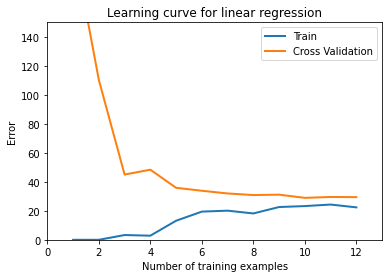

In [11]:
X_aug = np.concatenate([np.ones((m, 1)), X], axis=1)
Xval_aug = np.concatenate([np.ones((yval.size, 1)), Xval], axis=1)
error_train, error_val = learningCurve(X_aug, y, Xval_aug, yval, lambda_=0)

pyplot.plot(np.arange(1, m+1), error_train, np.arange(1, m+1), error_val, lw=2)
pyplot.title('Learning curve for linear regression')
pyplot.legend(['Train', 'Cross Validation'])
pyplot.xlabel('Number of training examples')
pyplot.ylabel('Error')
pyplot.axis([0, 13, 0, 150])

print('# Training Examples\tTrain Error\tCross Validation Error')
for i in range(m):
    print('  \t%d\t\t%f\t%f' % (i+1, error_train[i], error_val[i]))

In the learning curve figure, you can observe that both the train error and cross validation error are high when the number of training examples is increased. This reflects a high bias problem in the model - the linear regression model is too simple and is unable to fit our dataset well. In the next section, you will implement polynomial regression to fit a better model for this dataset.

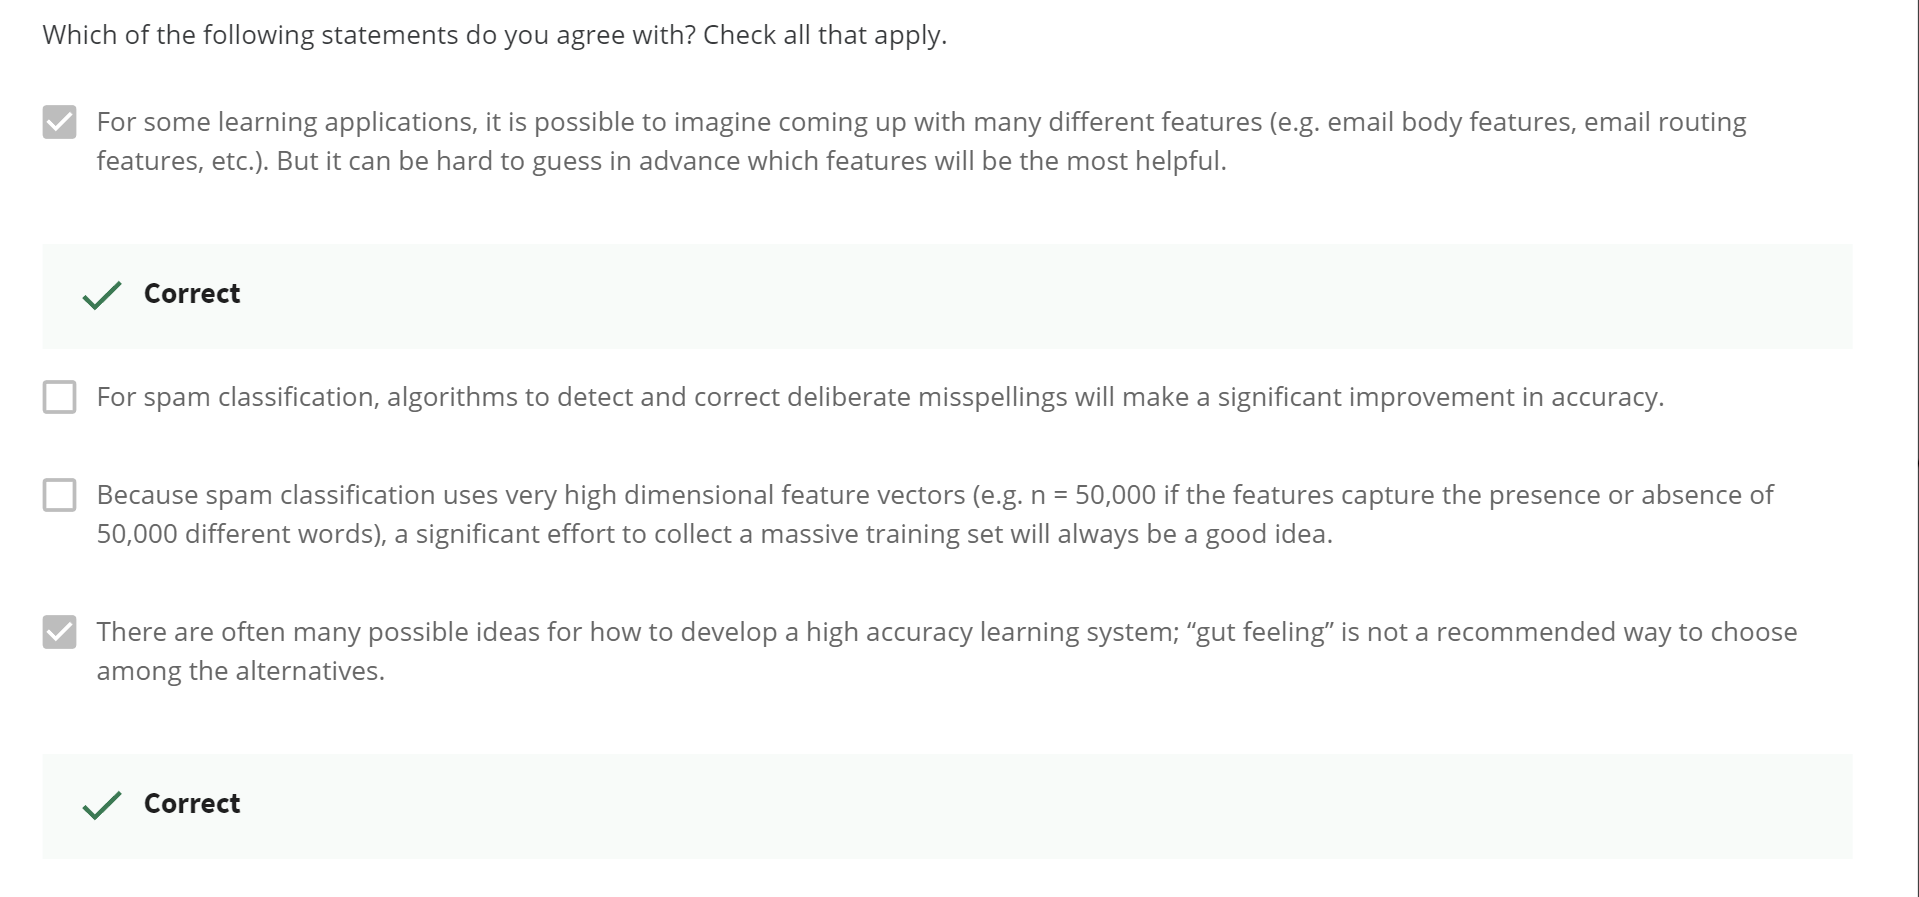

### Learning Polynomial Regression

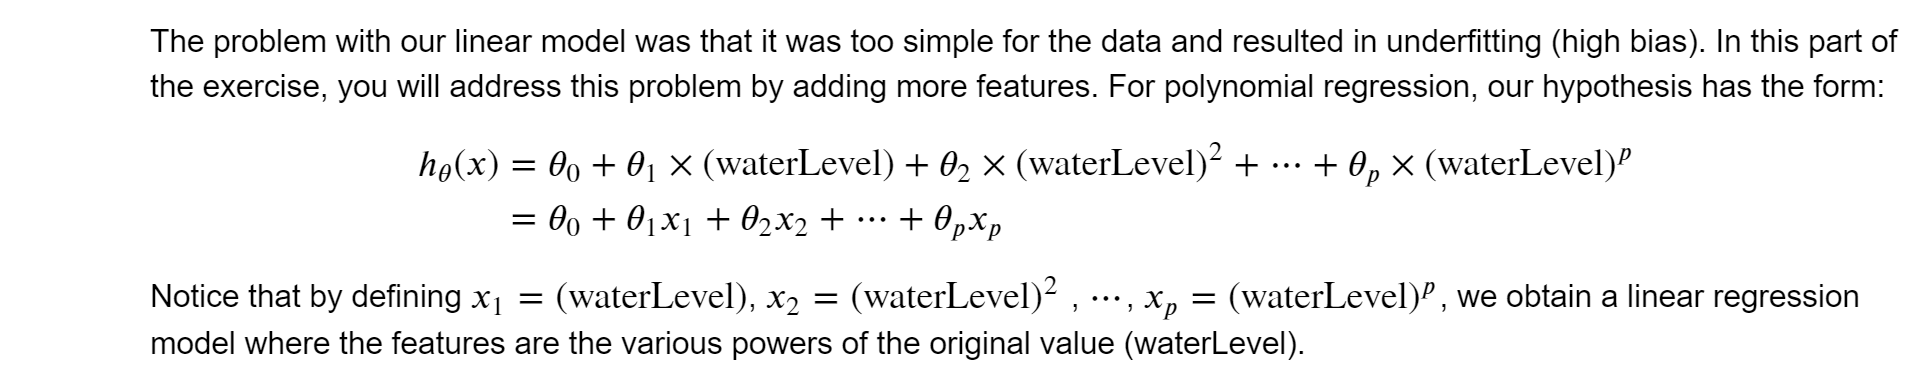



In [12]:
def polyFeatures(X, p):
    """
    Maps X (1D vector) into the p-th power.
    
    Instructions
    ------------
    Given a vector X, return a matrix X_poly where the p-th column of
    X contains the values of X to the p-th power.
    """
    # You need to return the following variables correctly.
    X_poly = np.zeros((X.shape[0], p))

    # ====================== YOUR CODE HERE ======================

    for i in range(p):
        X_poly[:, i] = X[:, 0] ** (i + 1)
    # ============================================================

    return X_poly

In [14]:
p = 8

# Map X onto Polynomial Features and Normalize
X_poly = polyFeatures(X, p)
X_poly, mu, sigma = utils_5.featureNormalize(X_poly)
X_poly = np.concatenate([np.ones((m, 1)), X_poly], axis=1)

# Map X_poly_test and normalize (using mu and sigma)
X_poly_test = polyFeatures(Xtest, p)
X_poly_test -= mu
X_poly_test /= sigma
X_poly_test = np.concatenate([np.ones((ytest.size, 1)), X_poly_test], axis=1)

# Map X_poly_val and normalize (using mu and sigma)
X_poly_val = polyFeatures(Xval, p)
X_poly_val -= mu
X_poly_val /= sigma
X_poly_val = np.concatenate([np.ones((yval.size, 1)), X_poly_val], axis=1)

print('Normalized Training Example 1:')
X_poly[0, :]

Normalized Training Example 1:


array([ 1.        , -0.36214078, -0.75508669,  0.18222588, -0.70618991,
        0.30661792, -0.59087767,  0.3445158 , -0.50848117])

In [15]:
np.set_printoptions(suppress=True)

In [16]:
X_poly

array([[ 1.        , -0.36214078, -0.75508669,  0.18222588, -0.70618991,
         0.30661792, -0.59087767,  0.3445158 , -0.50848117],
       [ 1.        , -0.80320484,  0.00125825, -0.24793699, -0.32702342,
         0.09339632, -0.43581761,  0.25541612, -0.44891249],
       [ 1.        ,  1.377467  ,  0.58482672,  1.24976856,  0.24531197,
         0.9783597 , -0.0121557 ,  0.75656848, -0.17035211],
       [ 1.        ,  1.42093988,  0.70664675,  1.35984559,  0.39553404,
         1.10616178,  0.12563713,  0.87192908, -0.05963769],
       [ 1.        , -1.43414853,  1.85399982, -2.03716308,  2.33143133,
        -2.41153626,  2.60221195, -2.64567451,  2.76608525],
       [ 1.        , -0.12868709, -0.97596878,  0.25138508, -0.73968687,
         0.31695293, -0.59499663,  0.34581181, -0.50895535],
       [ 1.        ,  0.68058155, -0.78002895,  0.34065574, -0.71172112,
         0.32650913, -0.59179018,  0.34683   , -0.50861305],
       [ 1.        , -0.98853431,  0.451358  , -0.60128187,  0

After you have completed the function polyFeatures, we will proceed to train polynomial regression using your linear regression cost function.

Keep in mind that even though we have polynomial terms in our feature vector, we are still solving a linear regression optimization problem. The polynomial terms have simply turned into features that we can use for linear regression. We are using the same cost function and gradient that you wrote for the earlier part of this exercise.

For this part of the exercise, you will be using a polynomial of degree 8. It turns out that if we run the training directly on the projected data, will not work well as the features would be badly scaled (e.g., an example with  𝑥=40  will now have a feature  𝑥8=408=6.5×1012 ). Therefore, you will need to use feature normalization.

Before learning the parameters  𝜃  for the polynomial regression, we first call featureNormalize and normalize the features of the training set, storing the mu, sigma parameters separately. We have already implemented this function for you (in utils.py module) and it is the same function from the first exercise.
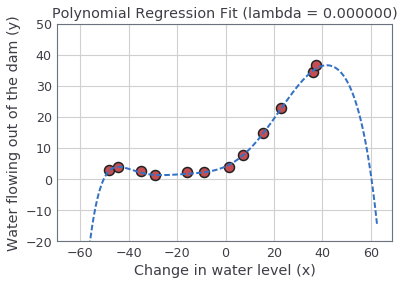 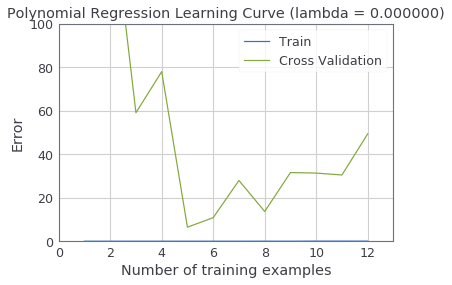

You should see that the polynomial fit is able to follow the datapoints very well, thus, obtaining a low training error. The figure on the right shows that the training error essentially stays zero for all numbers of training samples. However, the polynomial fit is very complex and even drops off at the extremes. **This is an indicator that the polynomial regression model is overfitting the training data and will not generalize well.**

To better understand the problems with the unregularized ( 𝜆=0 ) model, you can see that the learning curve shows the same effect where the training error is low, but the cross validation error is high. There is a gap between the training and cross validation errors, indicating a high variance problem.

Polynomial Regression (lambda = 0.000000)

# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	160.721900
  	2		0.000000	160.121511
  	3		0.000000	59.071634
  	4		0.000000	77.997739
  	5		0.000000	6.449225
  	6		0.000000	10.832583
  	7		0.000000	27.928144
  	8		0.000001	21.245381
  	9		0.000247	32.070022
  	10		0.029997	30.126844
  	11		0.034207	30.438979
  	12		0.029644	50.935194


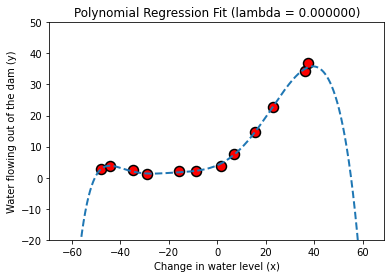

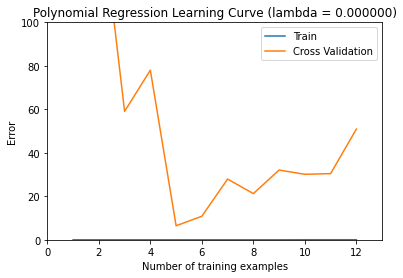

In [22]:
lambda_ = 0
theta = utils_5.trainLinearReg(linearRegCostFunction, X_poly, y,
                             lambda_=lambda_, maxiter=55)

# Plot training data and fit
pyplot.plot(X, y, 'ro', ms=10, mew=1.5, mec='k')

utils_5.plotFit(polyFeatures, np.min(X), np.max(X), mu, sigma, theta, p)

pyplot.xlabel('Change in water level (x)')
pyplot.ylabel('Water flowing out of the dam (y)')
pyplot.title('Polynomial Regression Fit (lambda = %f)' % lambda_)
pyplot.ylim([-20, 50])

pyplot.figure()
error_train, error_val = learningCurve(X_poly, y, X_poly_val, yval, lambda_)
pyplot.plot(np.arange(1, 1+m), error_train, np.arange(1, 1+m), error_val)

pyplot.title('Polynomial Regression Learning Curve (lambda = %f)' % lambda_)
pyplot.xlabel('Number of training examples')
pyplot.ylabel('Error')
pyplot.axis([0, 13, 0, 100])
pyplot.legend(['Train', 'Cross Validation'])

print('Polynomial Regression (lambda = %f)\n' % lambda_)
print('# Training Examples\tTrain Error\tCross Validation Error')
for i in range(m):
    print('  \t%d\t\t%f\t%f' % (i+1, error_train[i], error_val[i]))

let's increase the size of the lambda to 100

Polynomial Regression (lambda = 100.000000)

# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	138.846777
  	2		0.114107	144.125230
  	3		106.956580	70.863286
  	4		121.740879	78.372963
  	5		102.949459	63.845046
  	6		97.169857	59.532632
  	7		83.326539	59.585493
  	8		76.491825	58.699842
  	9		71.297176	59.564455
  	10		64.350636	59.731344
  	11		58.997943	60.409869
  	12		57.977080	57.842195


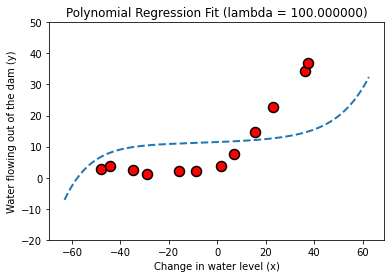

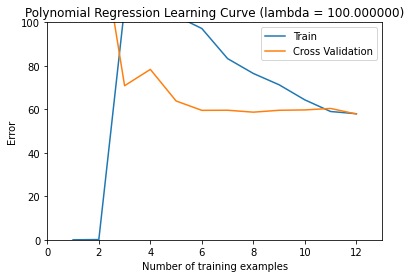

In [21]:
lambda_ = 100
theta = utils_5.trainLinearReg(linearRegCostFunction, X_poly, y,
                             lambda_=lambda_, maxiter=55)

# Plot training data and fit
pyplot.plot(X, y, 'ro', ms=10, mew=1.5, mec='k')

utils_5.plotFit(polyFeatures, np.min(X), np.max(X), mu, sigma, theta, p)

pyplot.xlabel('Change in water level (x)')
pyplot.ylabel('Water flowing out of the dam (y)')
pyplot.title('Polynomial Regression Fit (lambda = %f)' % lambda_)
pyplot.ylim([-20, 50])

pyplot.figure()
error_train, error_val = learningCurve(X_poly, y, X_poly_val, yval, lambda_)
pyplot.plot(np.arange(1, 1+m), error_train, np.arange(1, 1+m), error_val)

pyplot.title('Polynomial Regression Learning Curve (lambda = %f)' % lambda_)
pyplot.xlabel('Number of training examples')
pyplot.ylabel('Error')
pyplot.axis([0, 13, 0, 100])
pyplot.legend(['Train', 'Cross Validation'])

print('Polynomial Regression (lambda = %f)\n' % lambda_)
print('# Training Examples\tTrain Error\tCross Validation Error')
for i in range(m):
    print('  \t%d\t\t%f\t%f' % (i+1, error_train[i], error_val[i]))

One way to combat the overfitting (high-variance) problem is to add regularization to the model. In the next section, you will get to try different  𝜆  parameters to see how regularization can lead to a better model.

#### Selecting  𝜆  using a cross validation set

From the previous parts of the exercise, you observed that the value of  𝜆  can significantly affect the results of regularized polynomial regression on the training and cross validation set. In particular, a model without regularization ( 𝜆=0 ) fits the training set well, but does not generalize. Conversely, a model with too much regularization ( 𝜆=100 ) does not fit the training set and testing set well. A good choice of  𝜆  (e.g.,  𝜆=1 ) can provide a good fit to the data.

In this section, you will implement an automated method to select the  𝜆  parameter. Concretely, you will use a cross validation set to evaluate how good each  𝜆  value is. After selecting the best  𝜆  value using the cross validation set, we can then evaluate the model on the test set to estimate how well the model will perform on actual unseen data.

Your task is to complete the code in the function validationCurve. Specifically, you should should use the utils.trainLinearReg function to train the model using different values of  𝜆  and compute the training error and cross validation error. You should try  𝜆  in the following range: {0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10}.

In [25]:
def validationCurve(X, y, Xval, yval):
    """
    Generate the train and validation errors needed to plot a validation
    curve that we can use to select lambda_.
    
    Instructions
    ------------
    Fill in this function to return training errors in `error_train` and
    the validation errors in `error_val`. The vector `lambda_vec` contains
    the different lambda parameters to use for each calculation of the
    errors, i.e, `error_train[i]`, and `error_val[i]` should give you the
    errors obtained after training with `lambda_ = lambda_vec[i]`.

              ....
    """
    # Selected values of lambda (you should not change this)
    lambda_vec = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]

    # You need to return these variables correctly.
    error_train = np.zeros(len(lambda_vec))
    error_val = np.zeros(len(lambda_vec))

    # ====================== YOUR CODE HERE ======================
    for i in range(len(lambda_vec)):
        lambda_try = lambda_vec[i]
        theta_t = utils_5.trainLinearReg(linearRegCostFunction, X, y, lambda_ = lambda_try)
        error_train[i], _ = linearRegCostFunction(X, y, theta_t, lambda_ = 0)
        error_val[i], _ = linearRegCostFunction(Xval, yval, theta_t, lambda_ = 0)
    # ============================================================
    return lambda_vec, error_train, error_val

lambda		Train Error	Validation Error
 0.000000	0.029644	50.935194
 0.001000	0.112247	9.813441
 0.003000	0.170890	16.329979
 0.010000	0.221474	16.947513
 0.030000	0.281864	12.828172
 0.100000	0.459323	7.586797
 0.300000	0.921759	4.636833
 1.000000	2.076200	4.260601
 3.000000	4.901380	3.822906
 10.000000	16.092273	9.945554


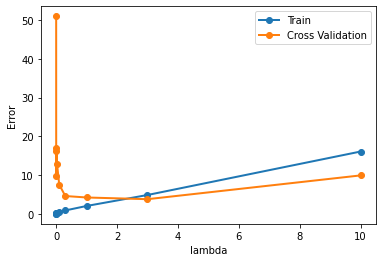

In [26]:
lambda_vec, error_train, error_val = validationCurve(X_poly, y, X_poly_val, yval)

pyplot.plot(lambda_vec, error_train, '-o', lambda_vec, error_val, '-o', lw=2)
pyplot.legend(['Train', 'Cross Validation'])
pyplot.xlabel('lambda')
pyplot.ylabel('Error')

print('lambda\t\tTrain Error\tValidation Error')
for i in range(len(lambda_vec)):
    print(' %f\t%f\t%f' % (lambda_vec[i], error_train[i], error_val[i]))

In this figure, we can see that the best value of  𝜆  is around 3. Due to randomness in the training and validation splits of the dataset, the cross validation error can sometimes be lower than the training error.

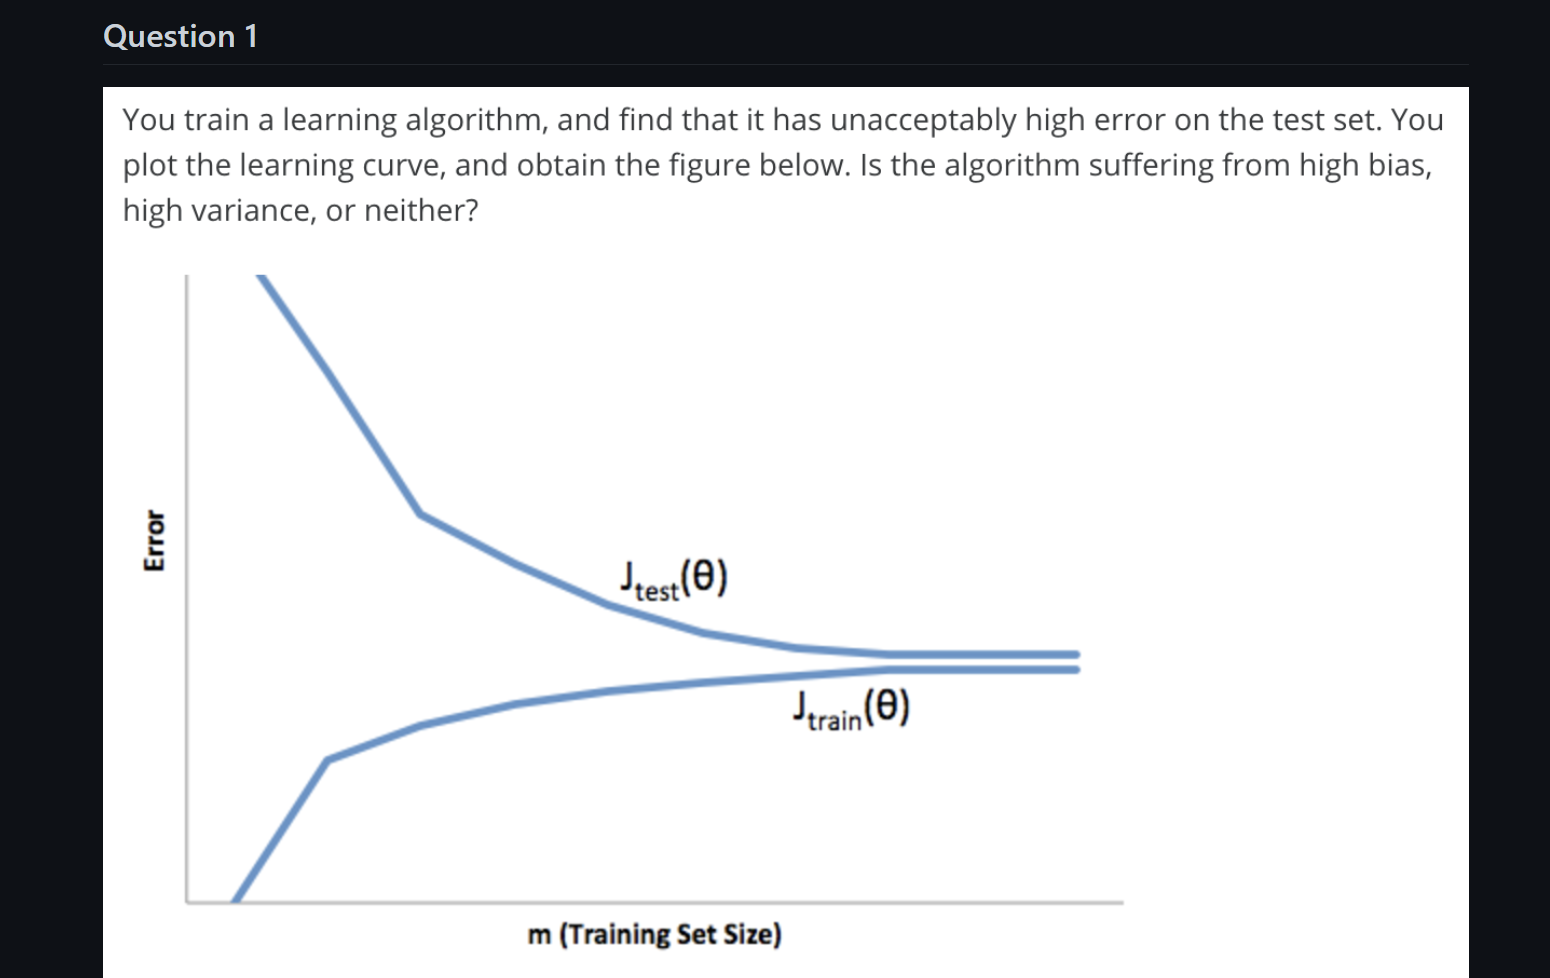

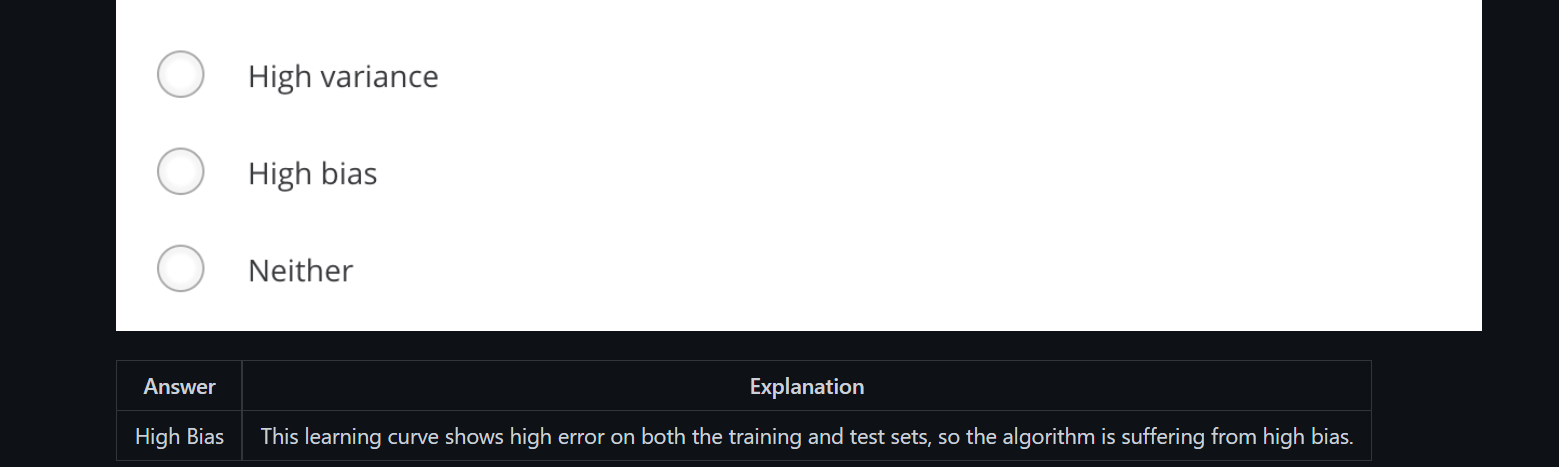

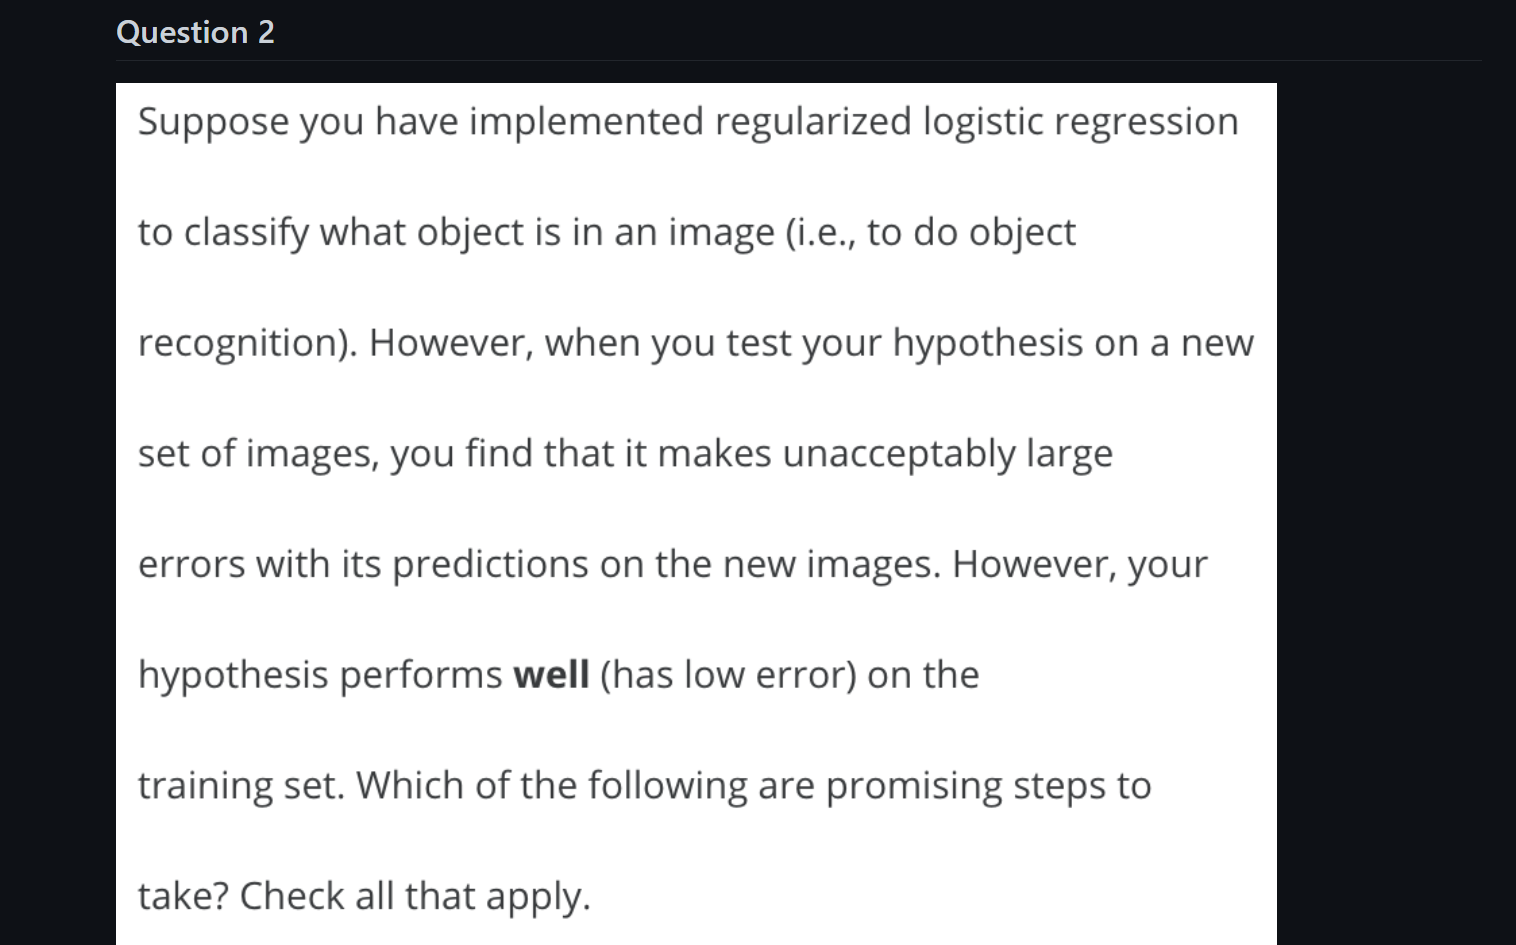

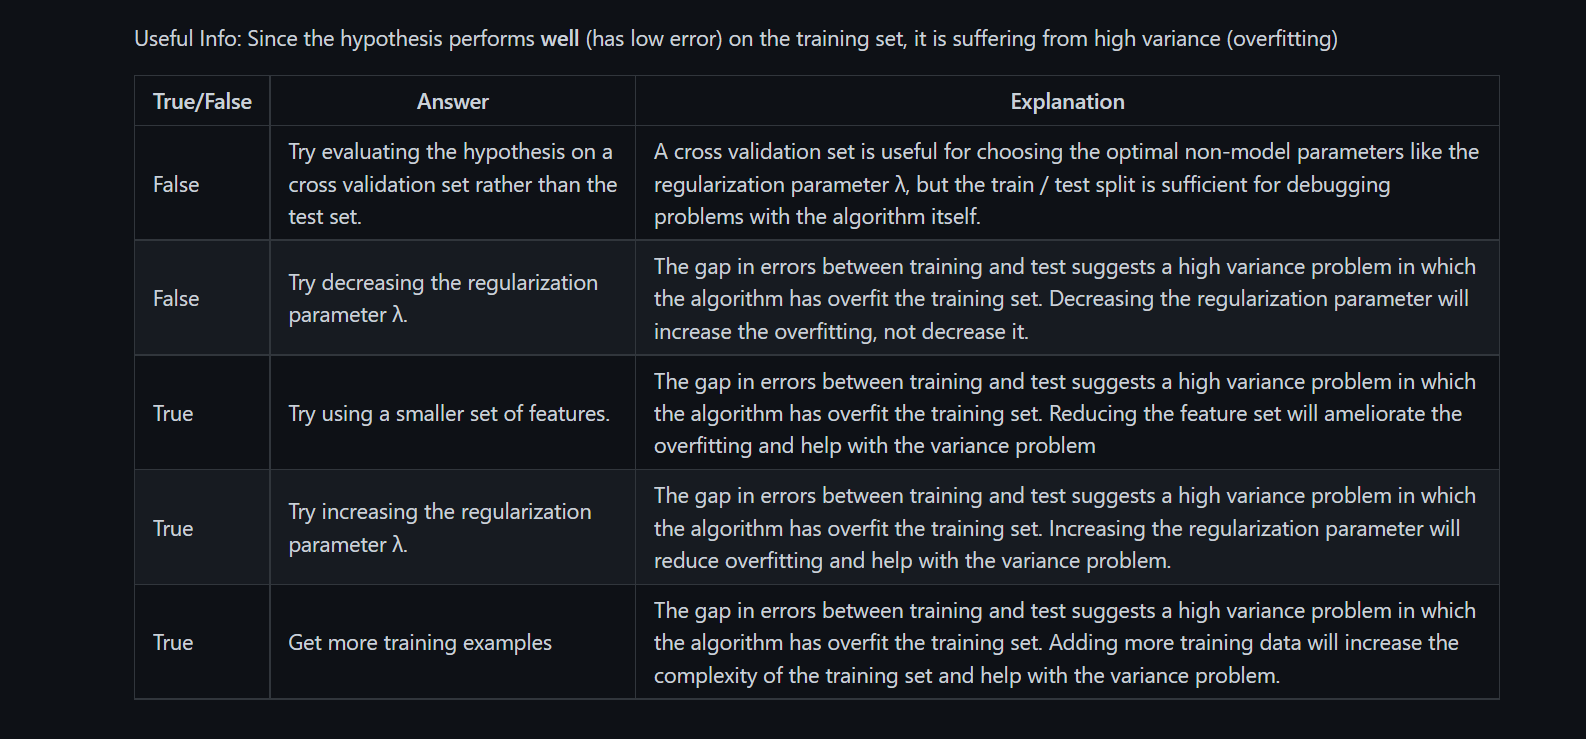

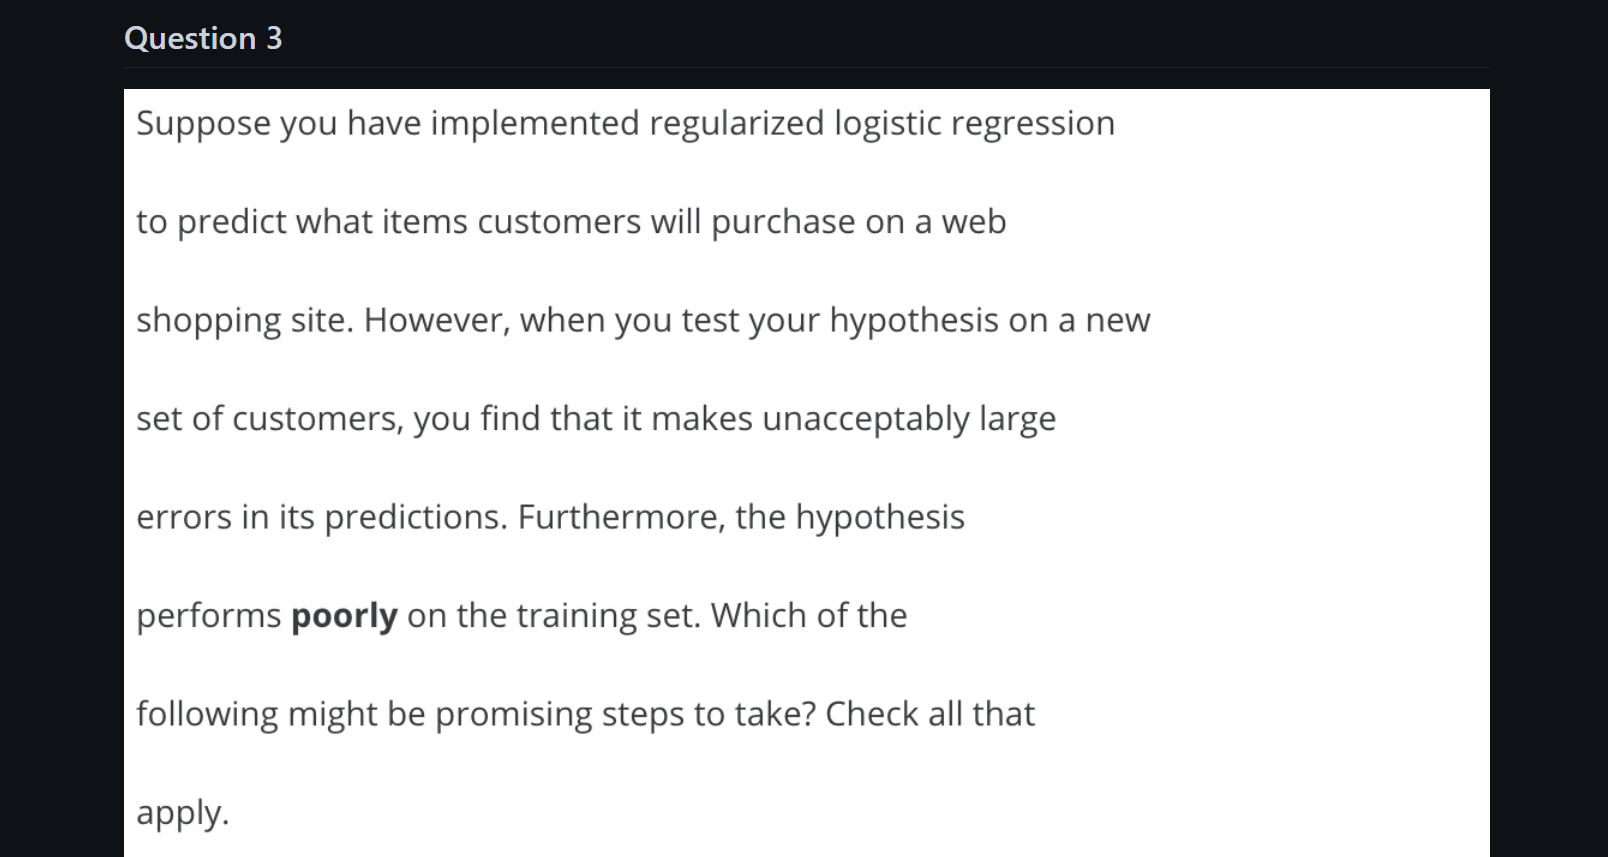

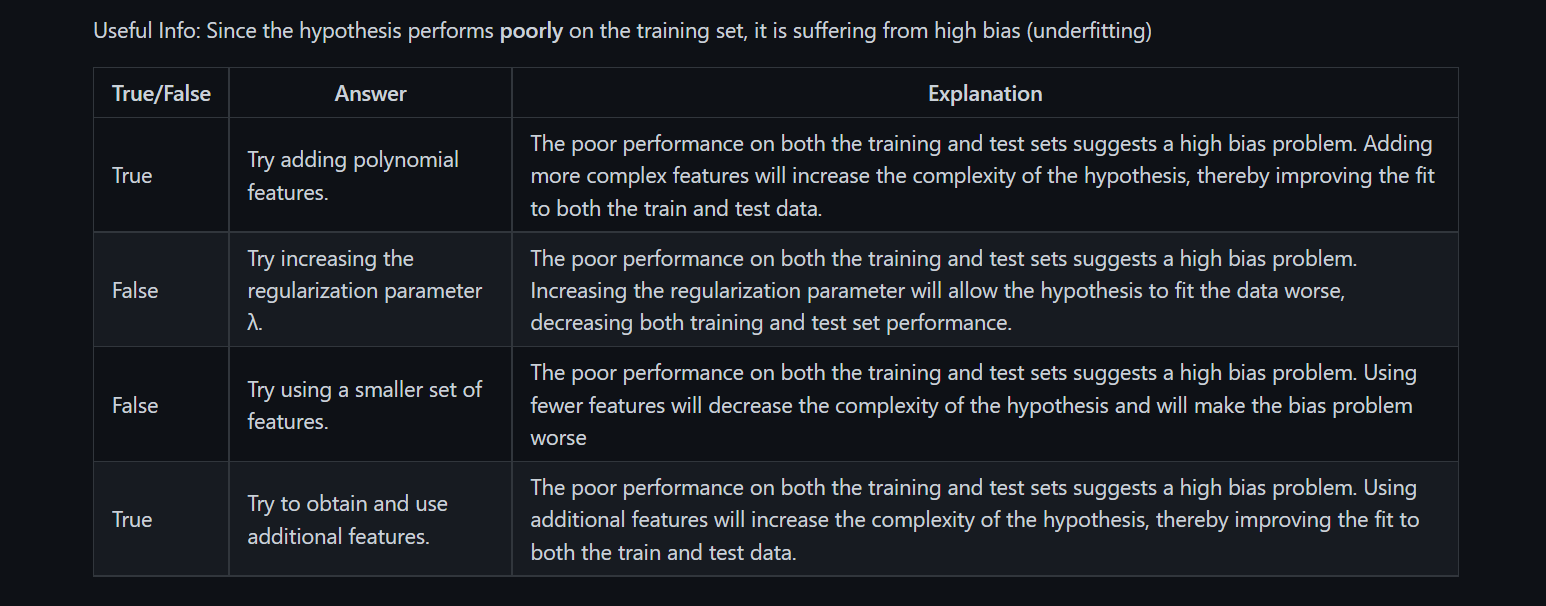

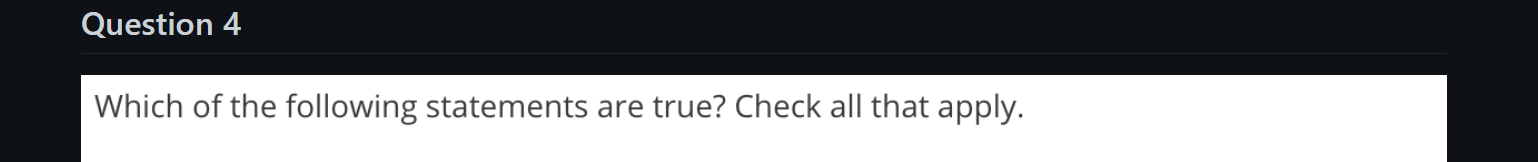

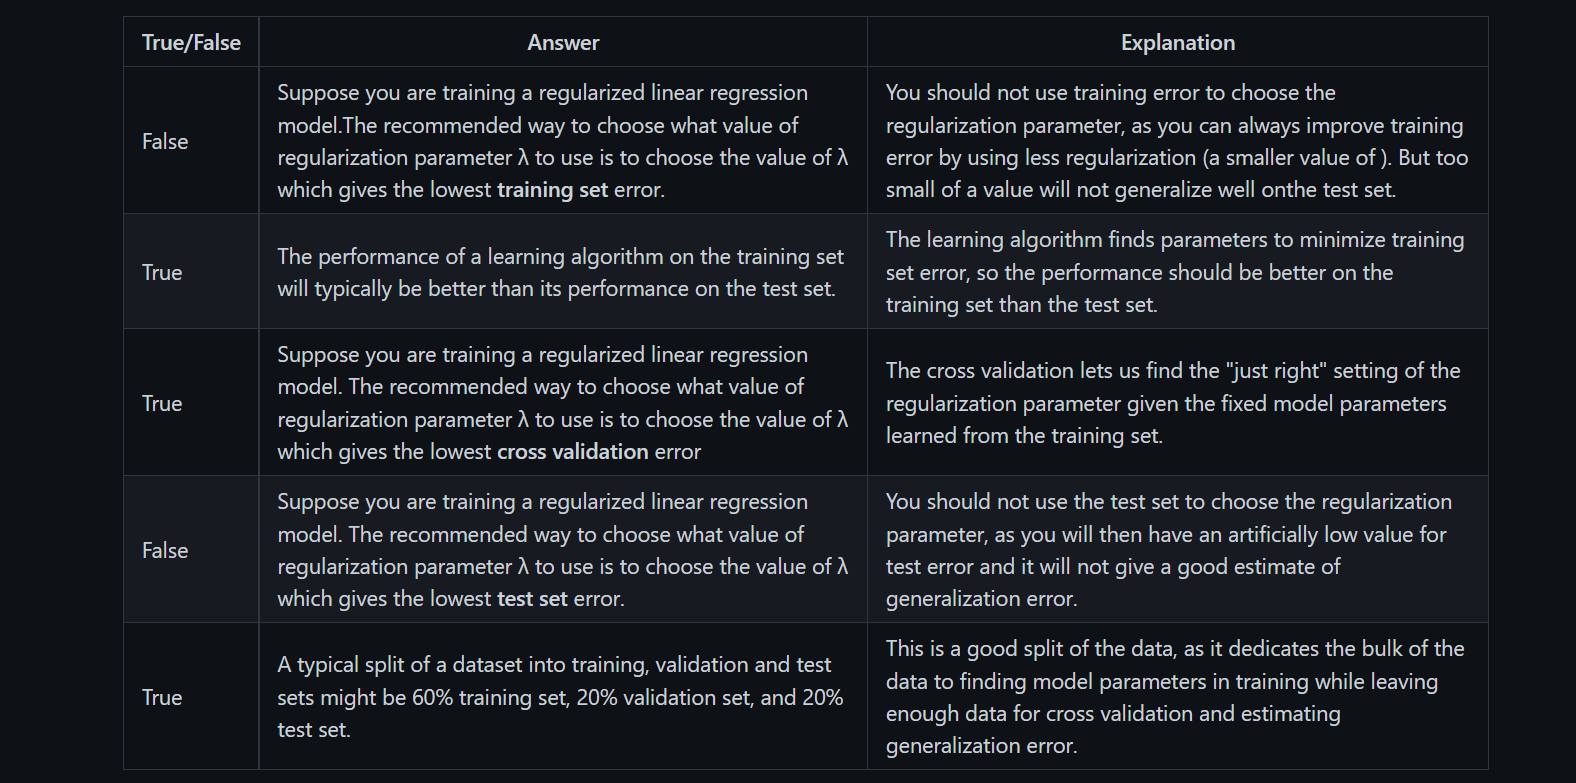

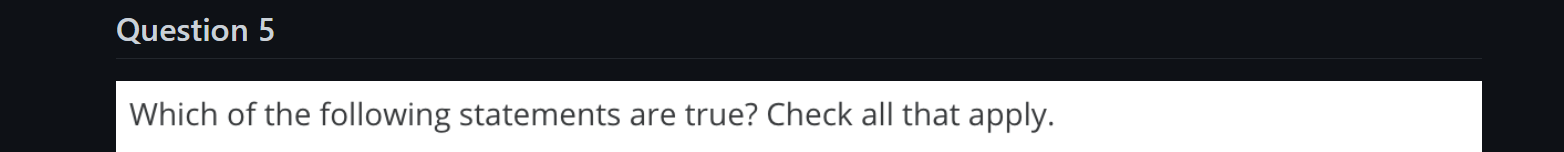

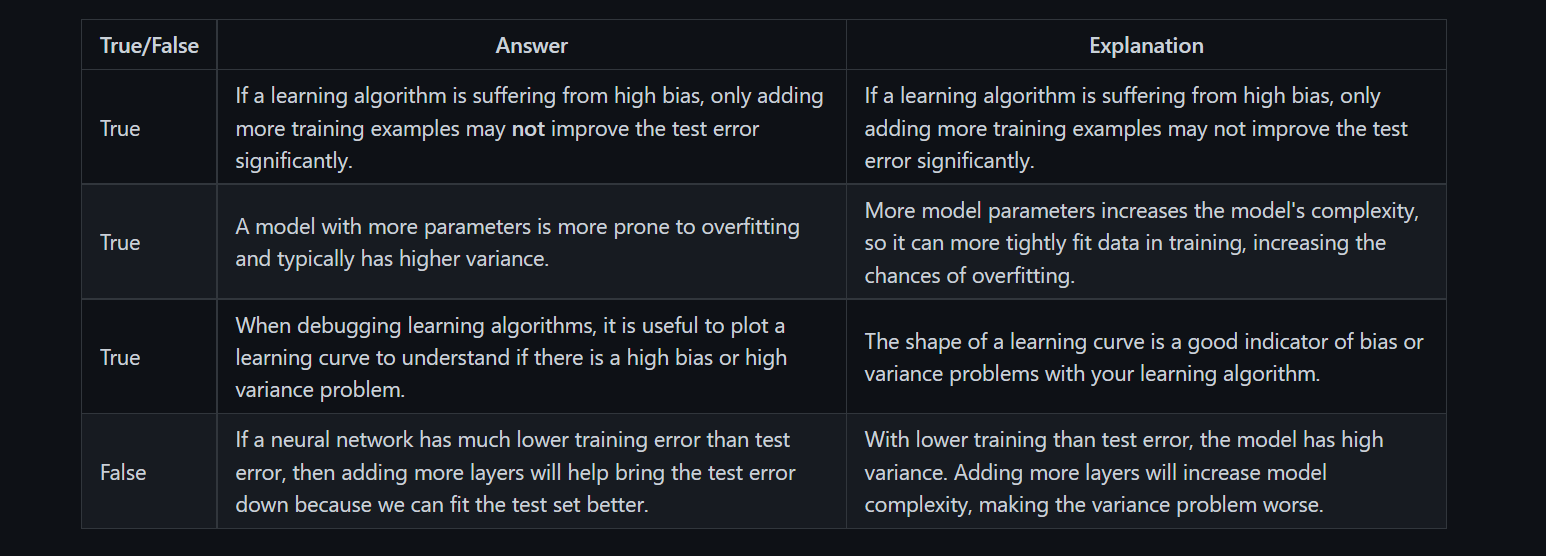

### Deciding What to Do Next

Our decision process can be broken down as follows:

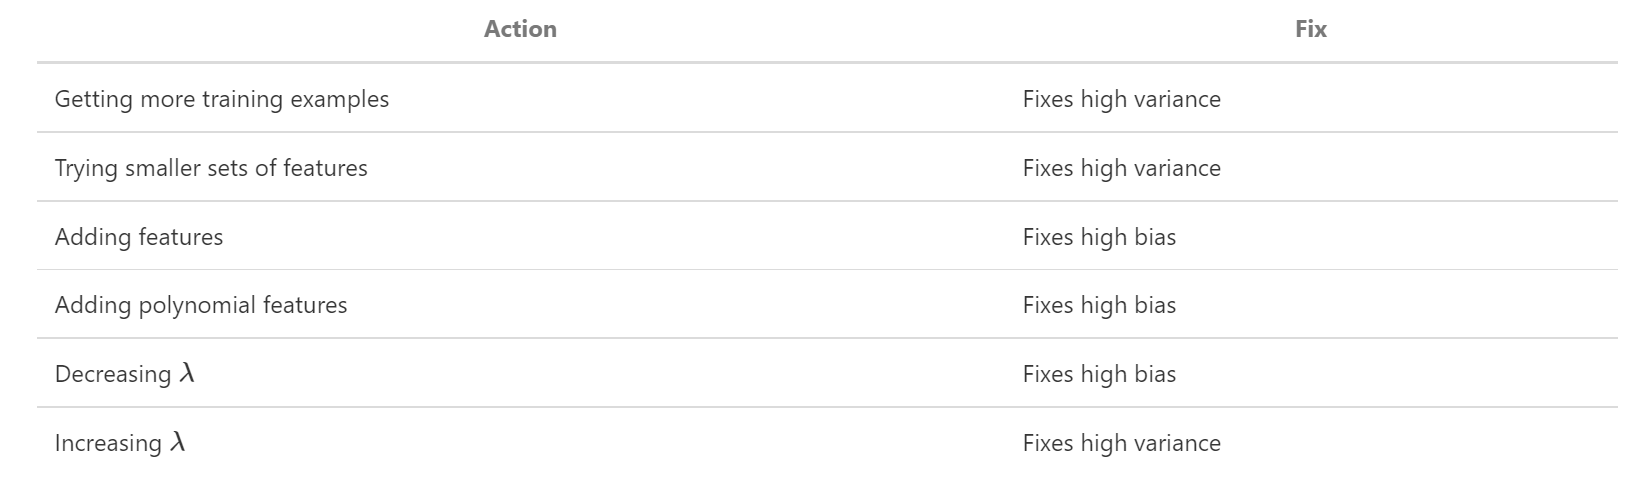

**Diagnosing Neural Networks**

- A neural network with fewer parameters is prone to underfitting. It is also computationally cheaper.
- A large neural network with more parameters is prone to overfitting. It is also computationally expensive. In this case, you can use regularization (increase λ) to address the overfitting.

Using a single hidden layer is a good starting default. You can train the neural network on a number of hidden layers using your cross validation set. You can then select the one that performs best.

**Model Complexity Effects:**

- Lower-order polynomials (lower model complexity) have high bias and low variance. In this case, the model fits poorly consistently.
- Higher-order polynomials (high model complexity) fit the training data extremely well and the test data extremely poorly. These have low bias but high variance.
- In reality, we want to choose a model in between that generalizes well and also fits the data reasonably well.

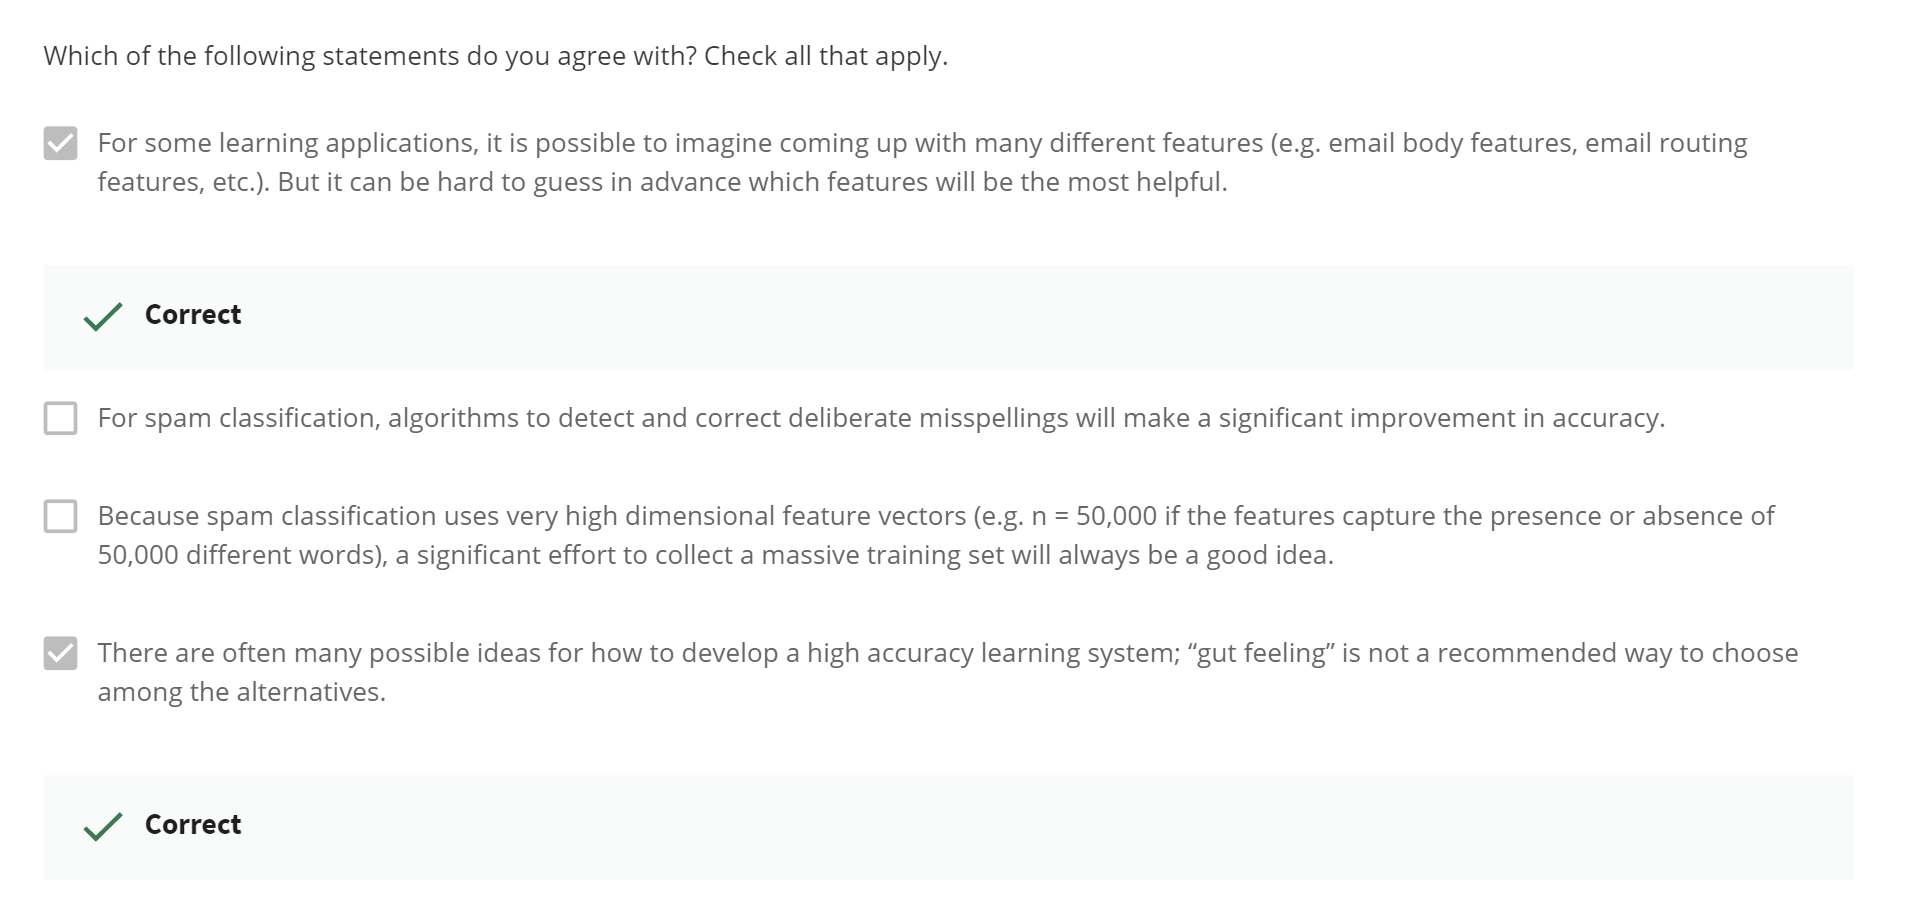

### Building a Spam Classifier

System Design Example:

Given a data set of emails, one could construct a vector for each email. An entry in this vector represents a word. The vector contains 10,000-50,000 entries gathered by finding the most frequently used words in the dataset. If a word is found in the email, we assign its entry as a 1, otherwise the entry would be 0. Once we have our X vectors ready, we train the algorithm and use it to classify if an email is spam or not.

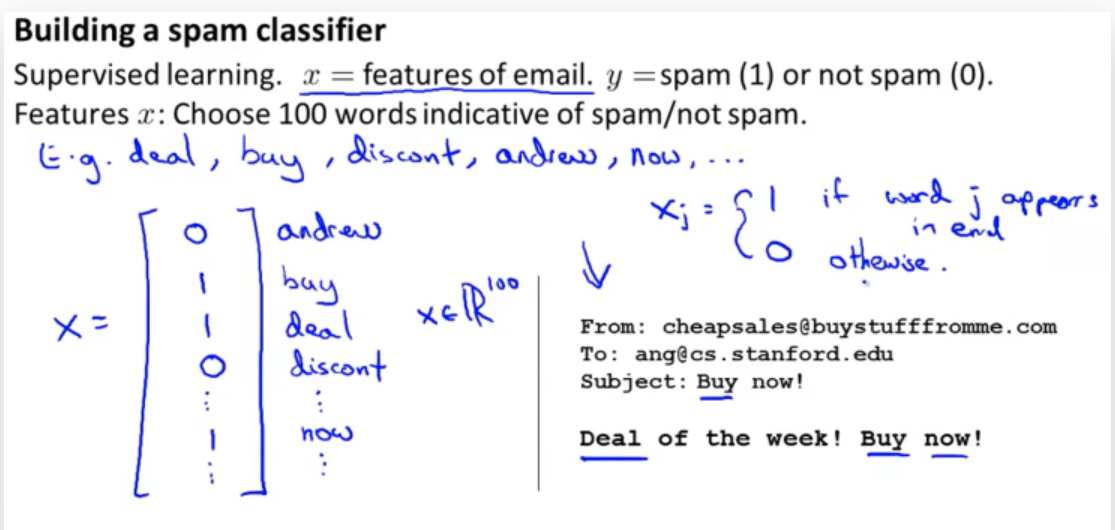

There are many ways to improve the accuracy of the this classifier.

- Collect lots of data (ex: honeypot project, but this doesn’t always work)
- Develop more sophisticated features (ex: using email header data in spam emails)
- Develop algorithms to process input in different ways (recognize mispellings in spam)

It is difficult to tell which of the options will be most helpful.

### Error Analysis

The recommended approach to solving a machine learning problem is to:

- Start with a simple algorithm that you can implement quickly and test it early on your cross validation data.
- Plot learning curves to decide if more data, more features, etc. are likely to help.
- Manually examine the examples (in cross validation set) that your algorithm made errors on. See if you can spot systematic trends in what type of examples it is making errors on.

For example, assume that we have 500 emails and the algorithm misclassifies 100 of them. Manually analyze the 100 emails and categorize them based on what type of emails they are. Then one could try to come up with new cues and features that woudl help classify these 100 emails correctly. For example, if most of the misclassified emails are those which try to steal passwords, we could find some features that are particular to those emails and add them to our model. We can also see how classifying each word according to its root changes our error rate.

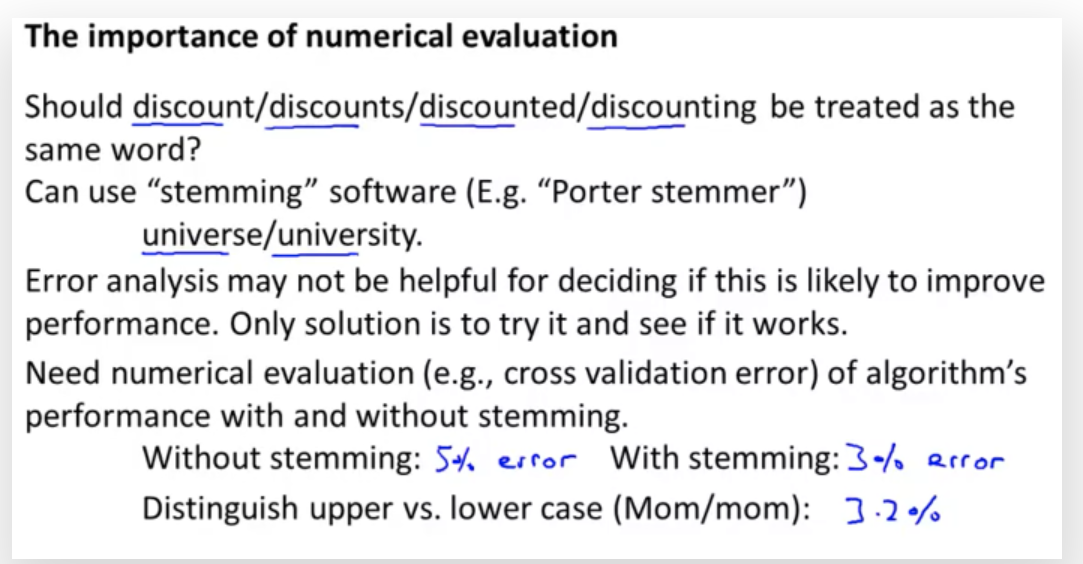

It is important to get error results as a single, numerical value. Otherwise, it is difficult to assess the algorithm’s performance

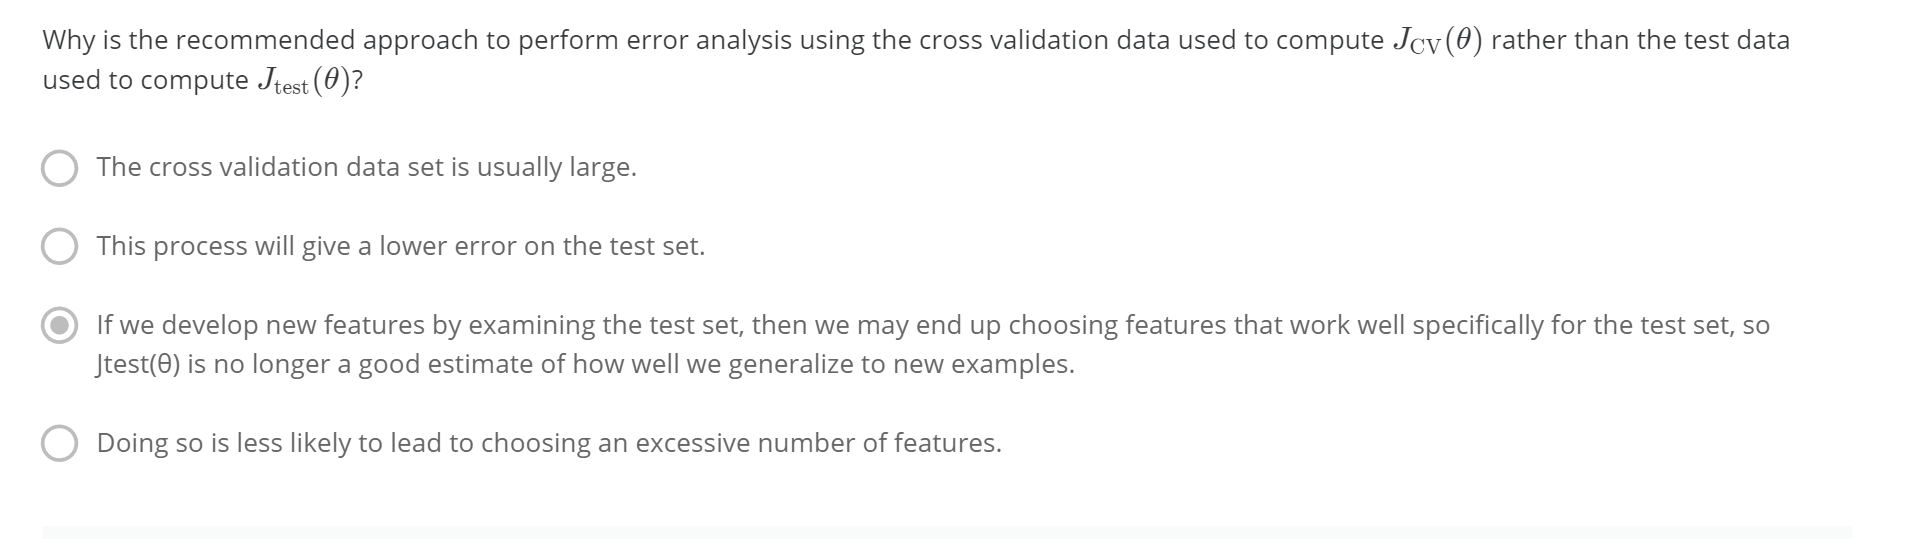

### How to Handle Skewed Data

The following metric is useful for datasets with very skewed data:

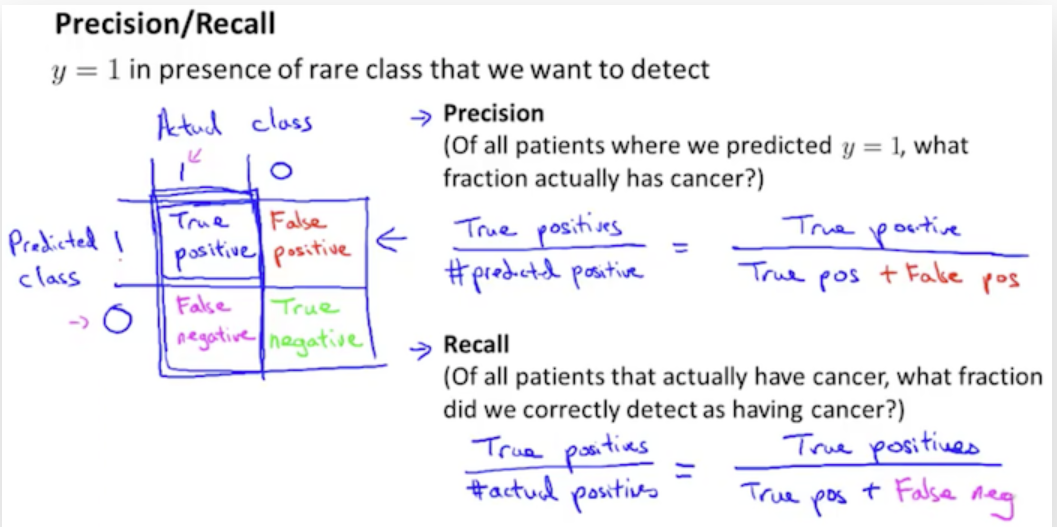

Trade off precision and recall depending on the use case of your classifier. You can compare various precision/recall numbers using a value called an F1 score:

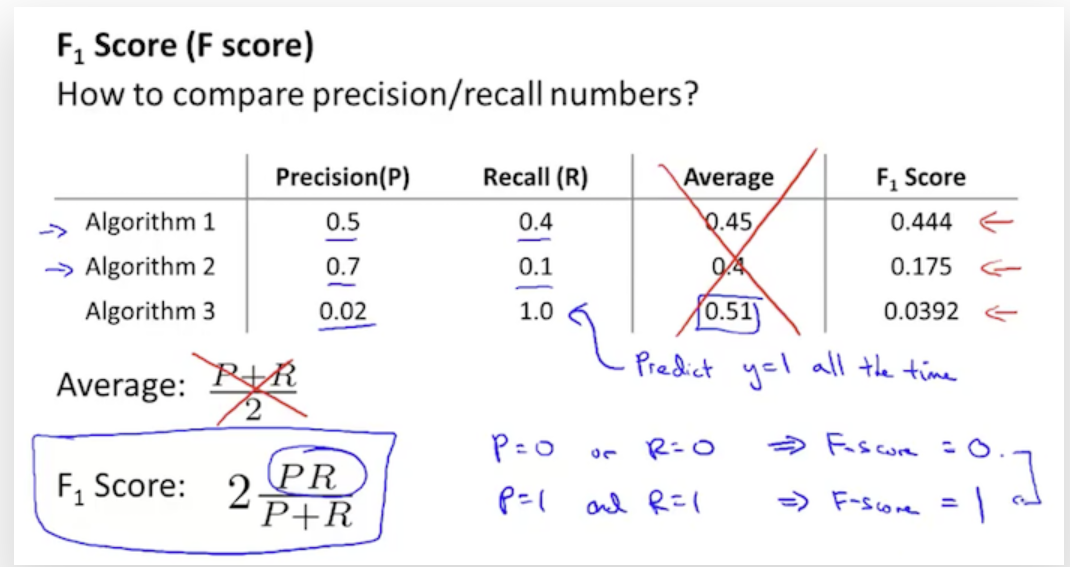

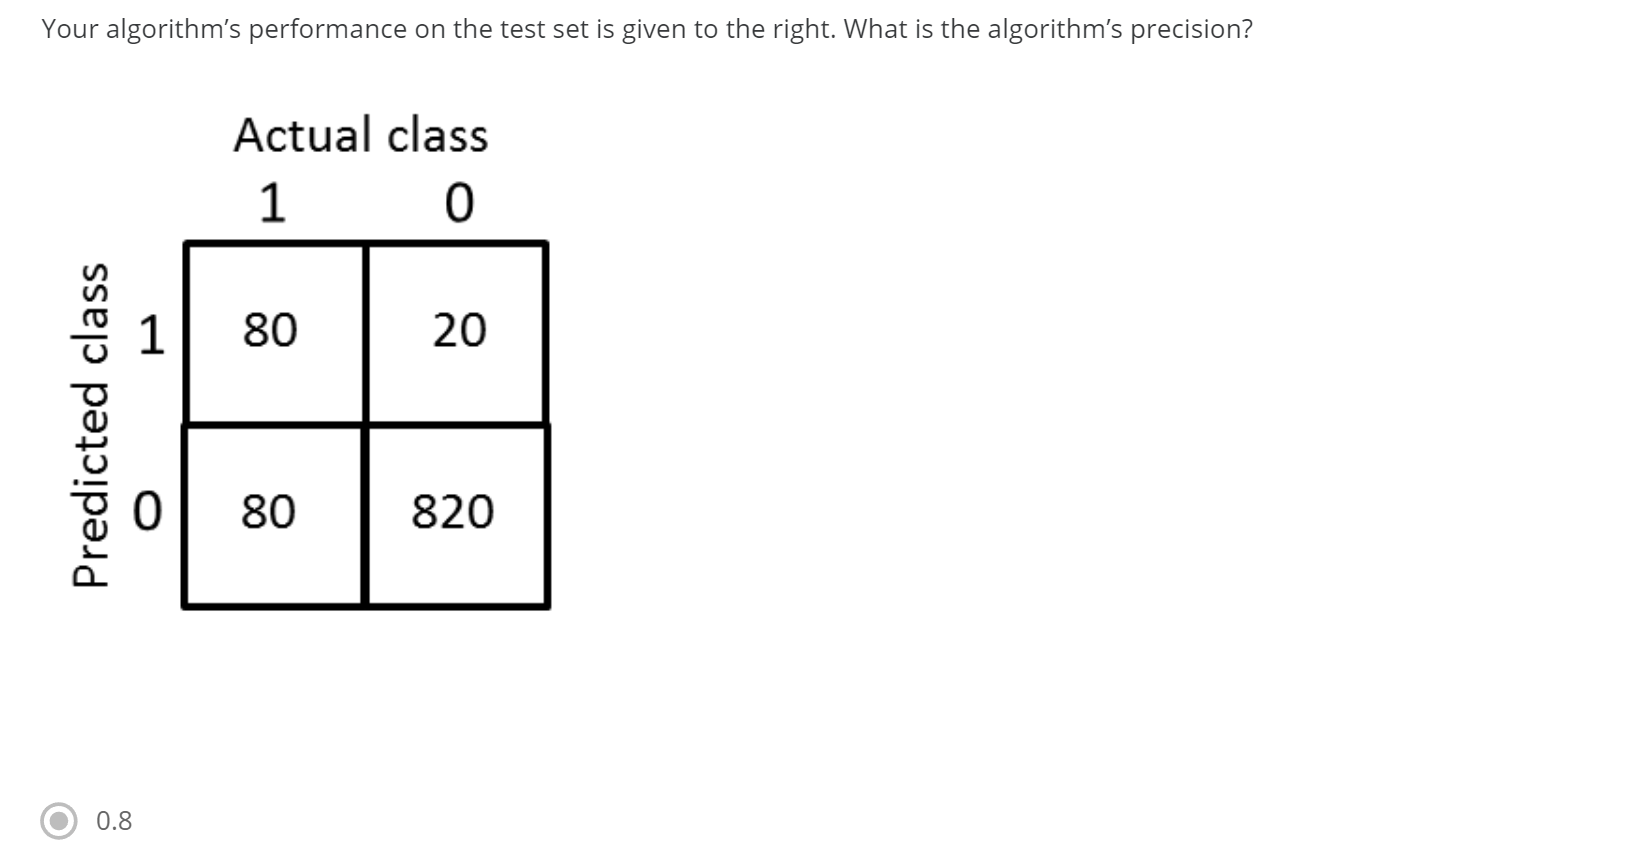

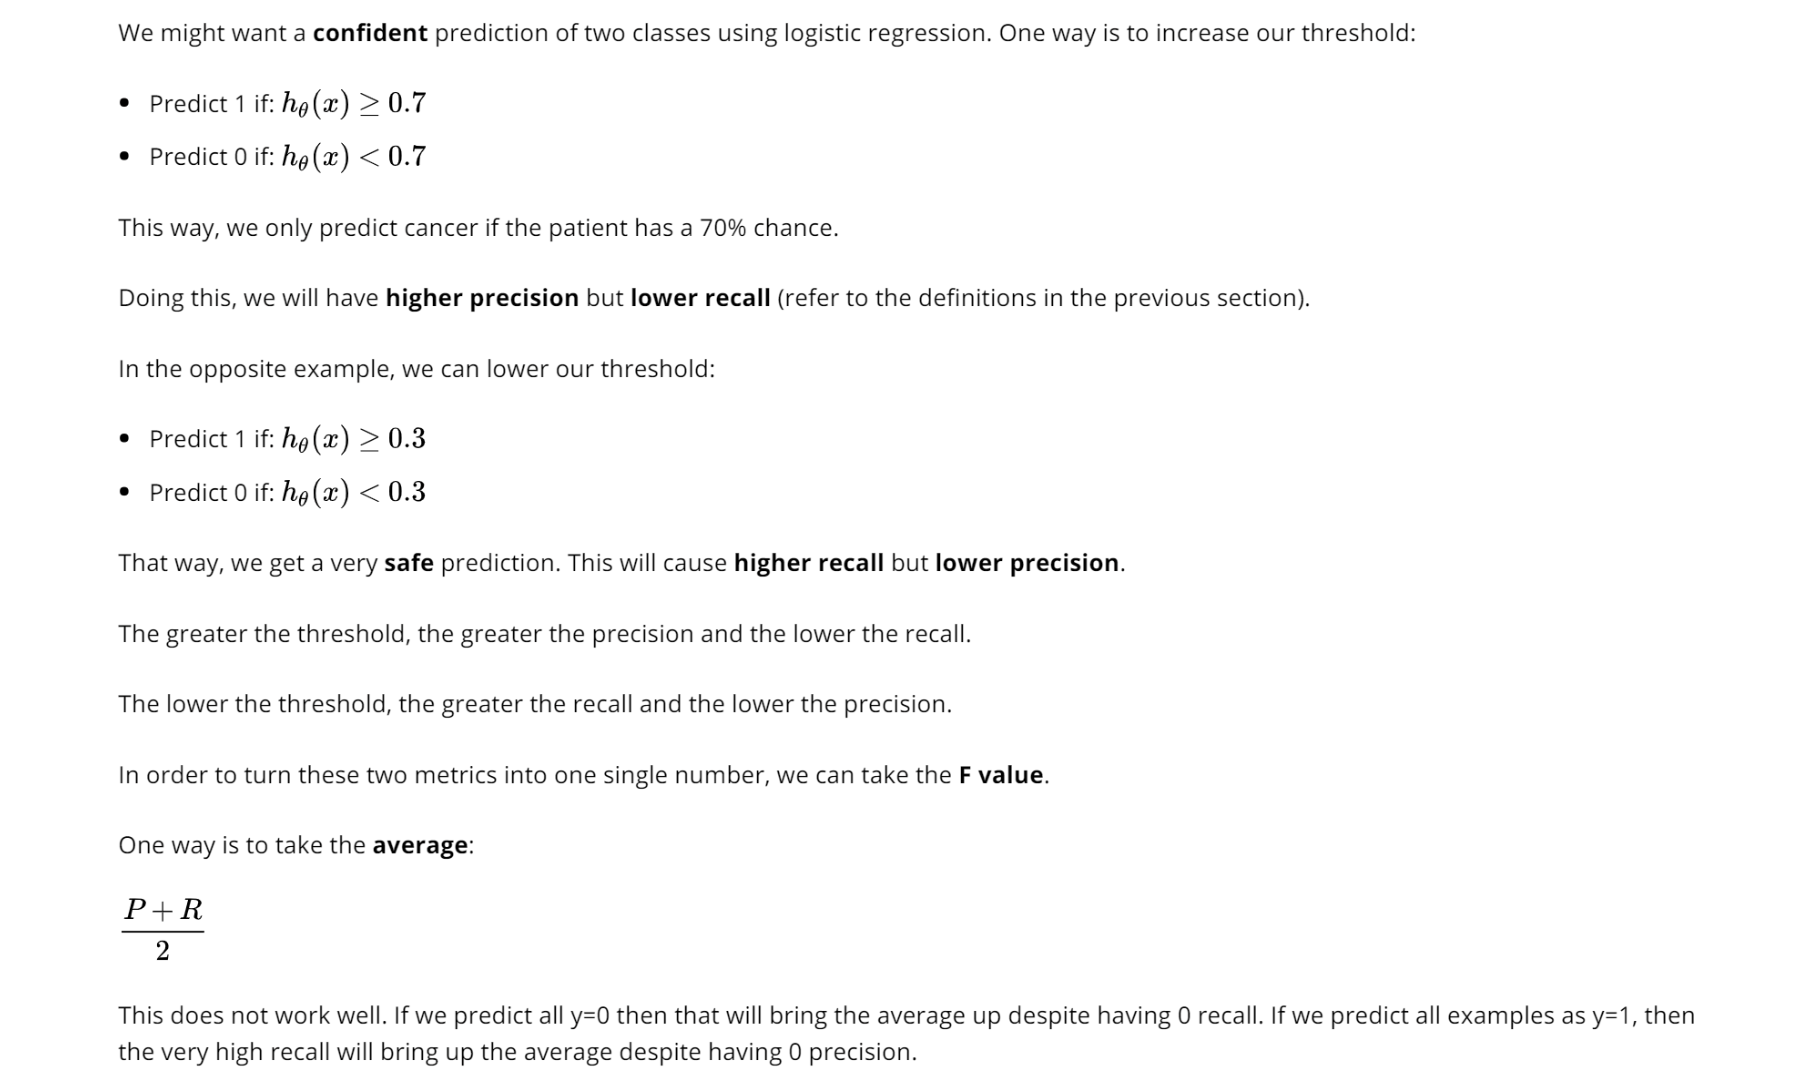

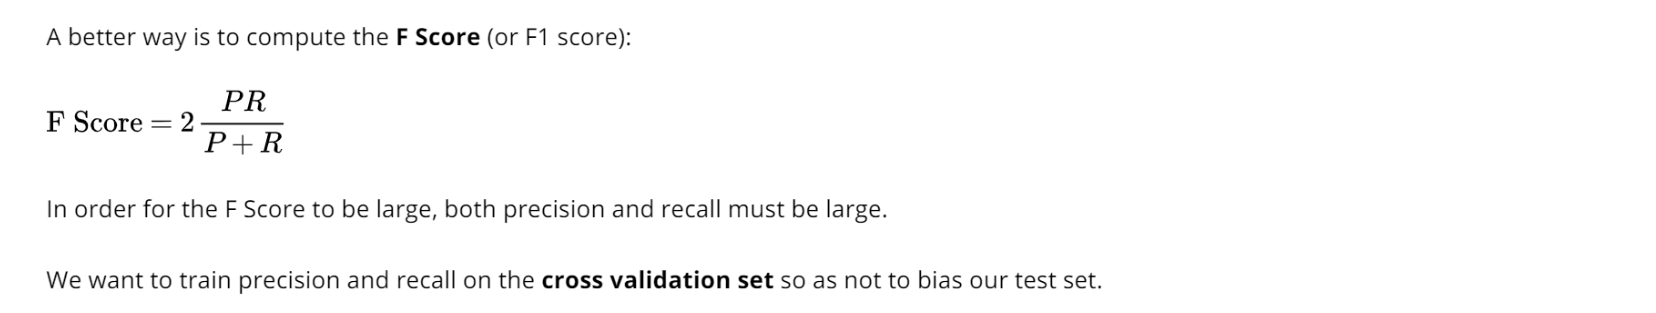

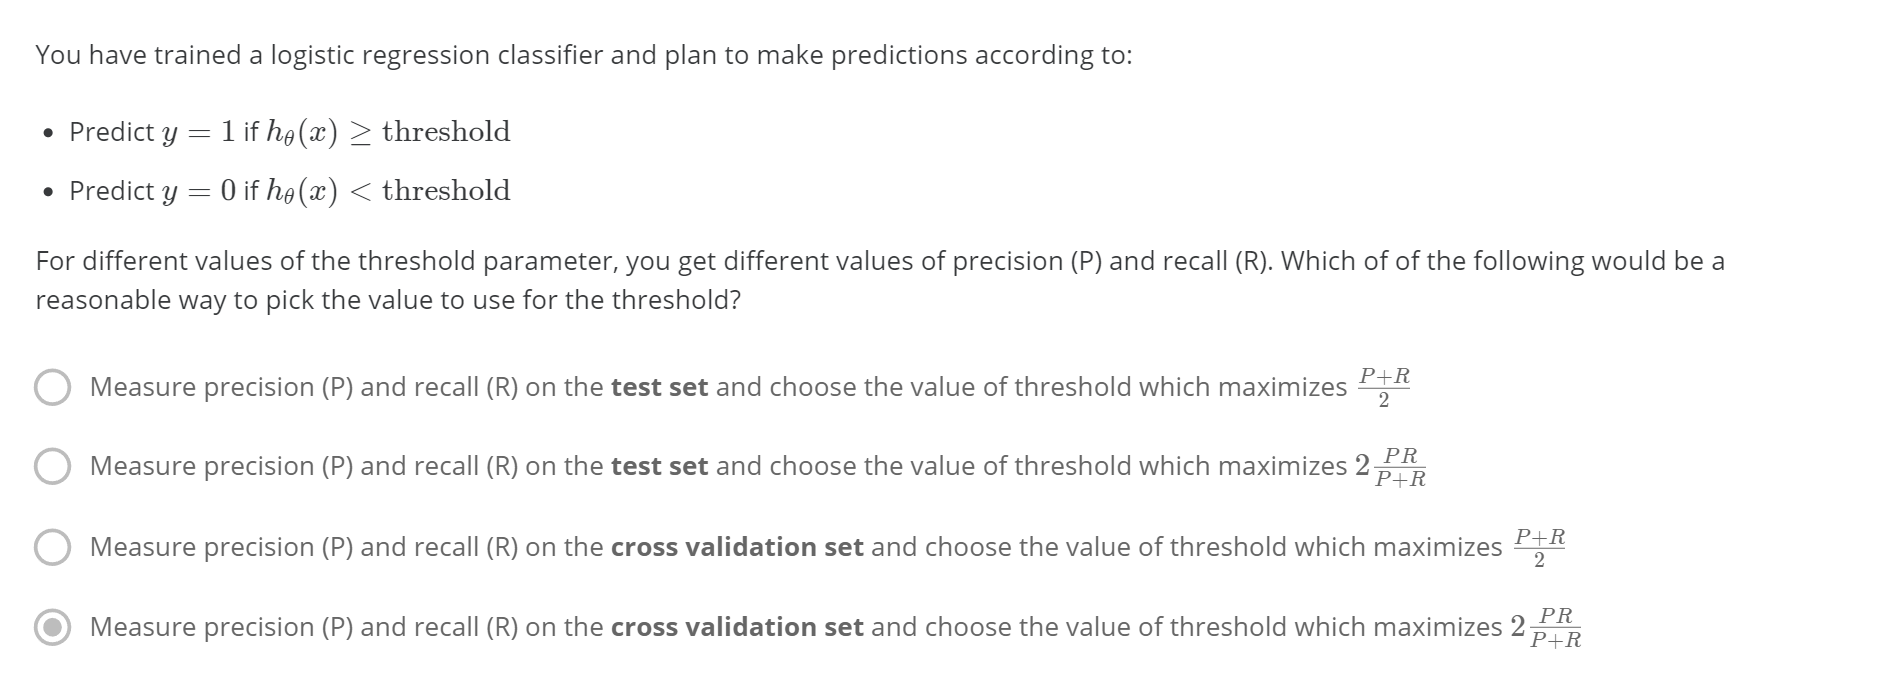

### When to Utilize Large Data Sets


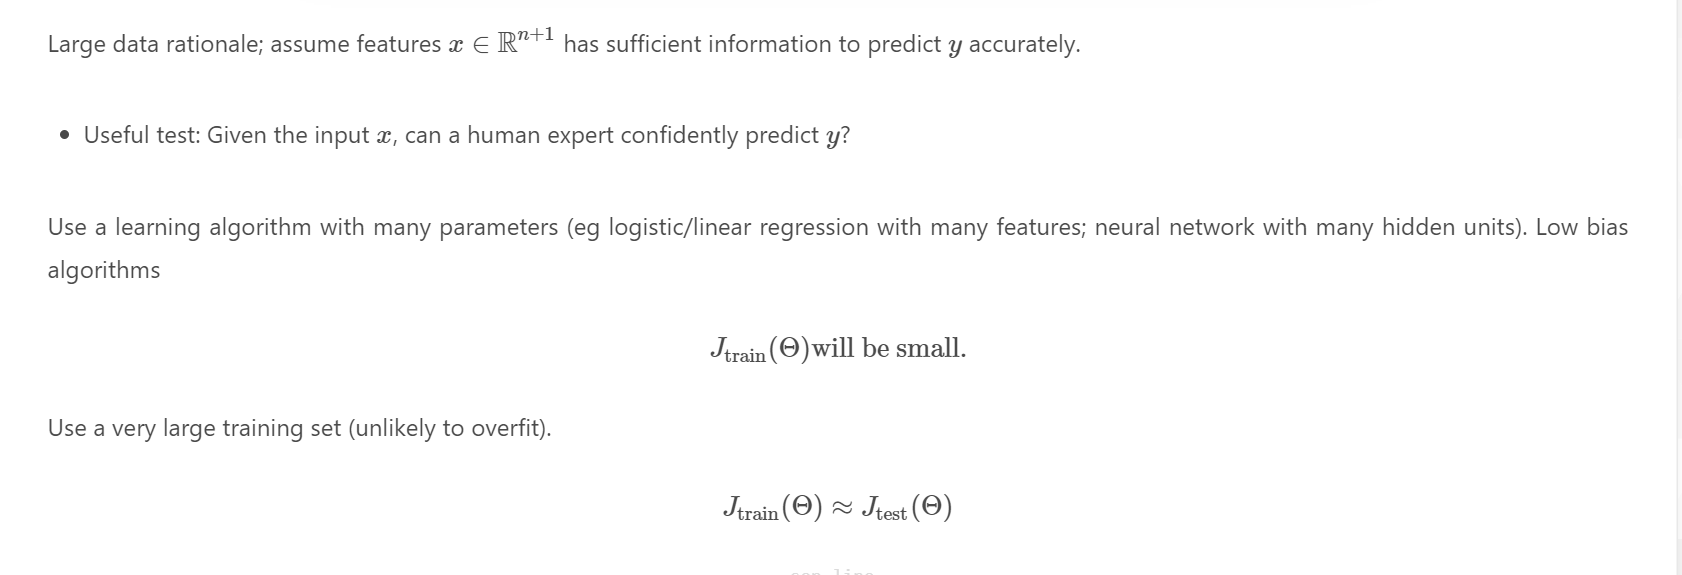

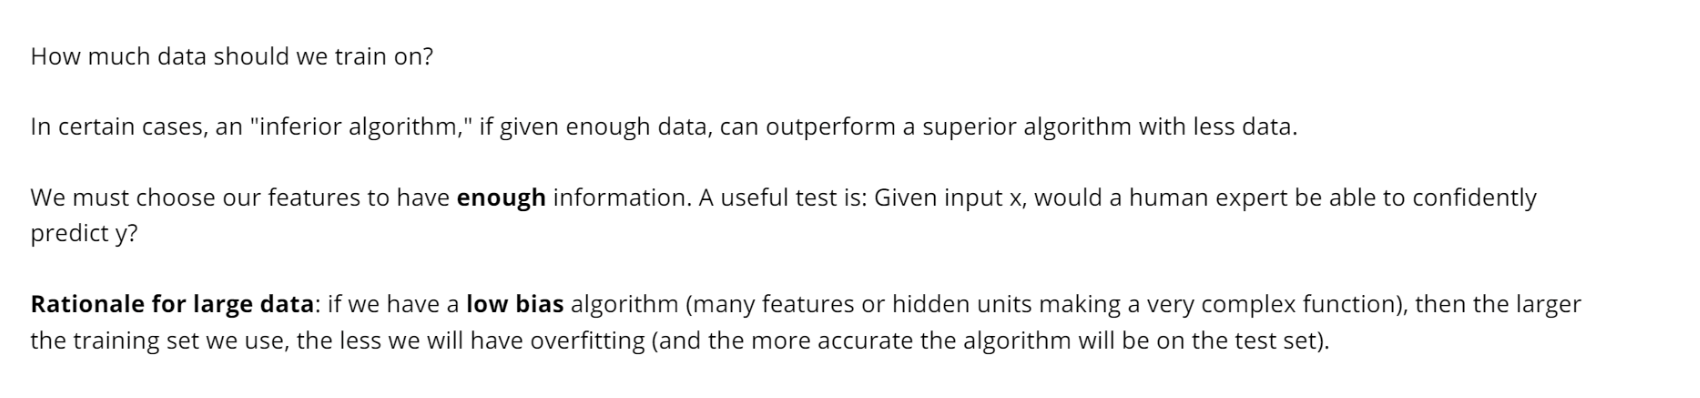

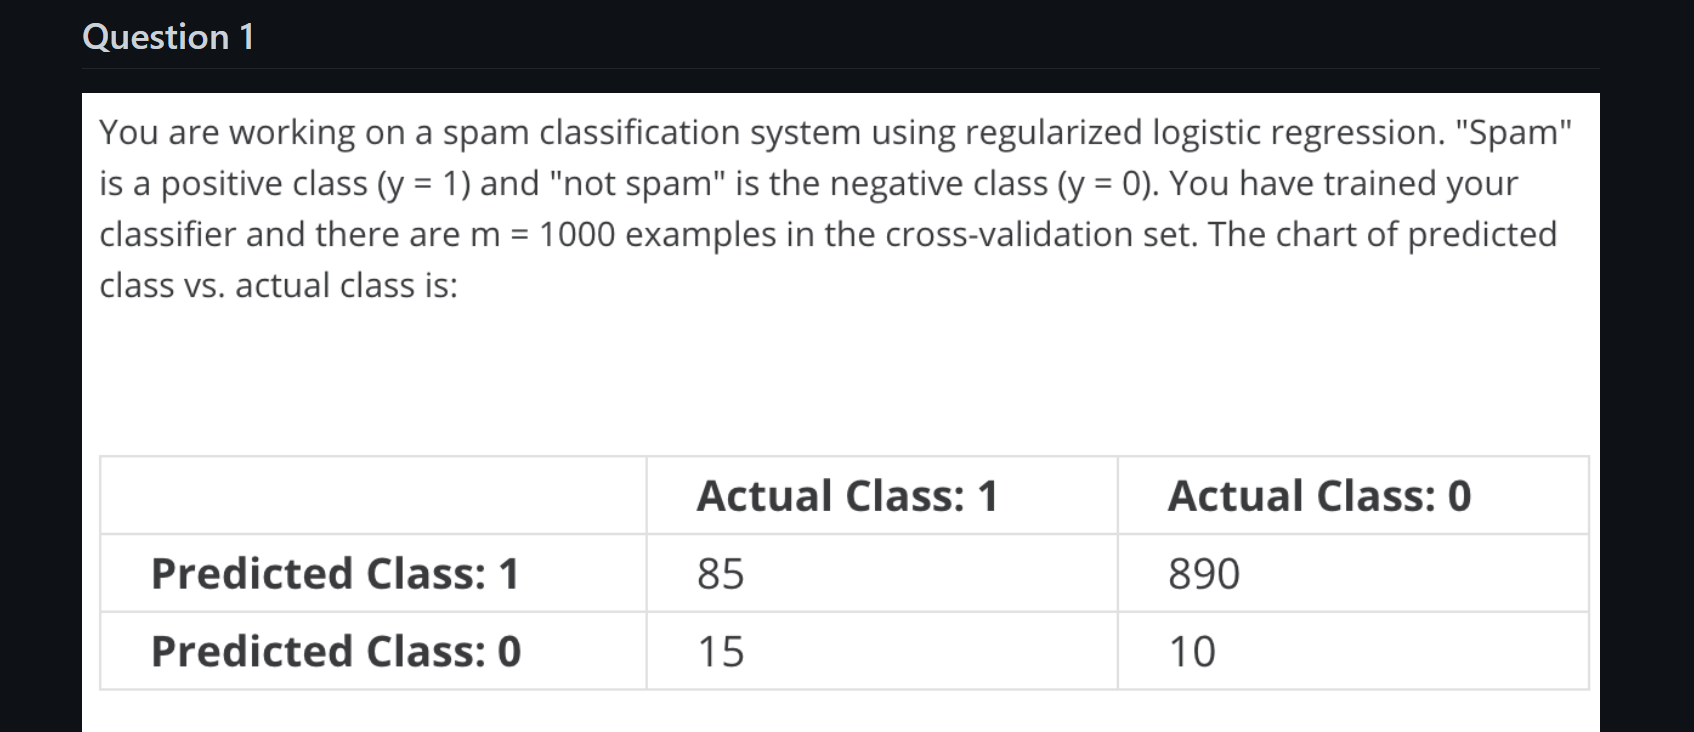

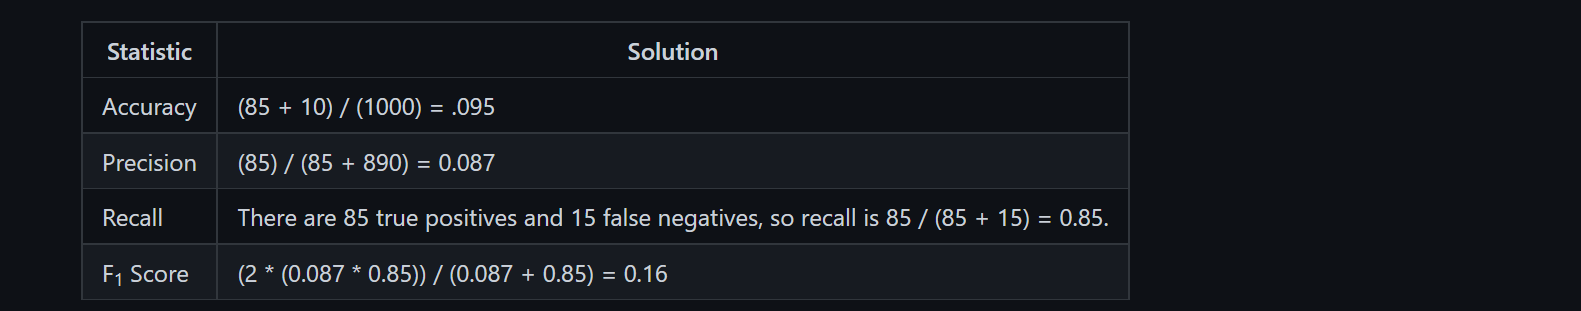

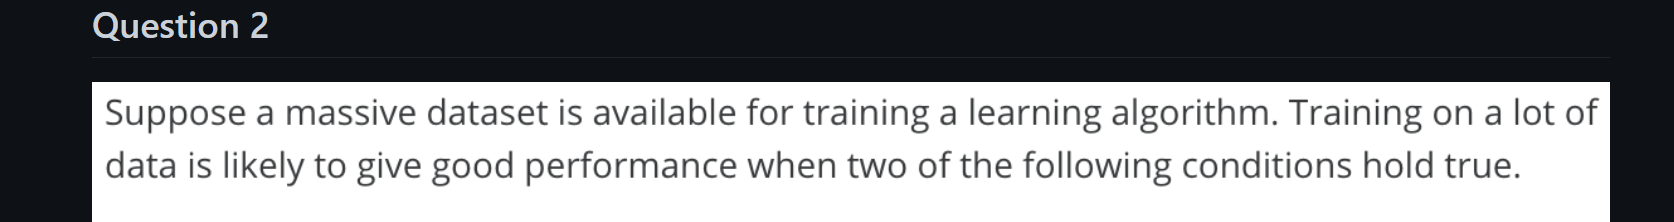

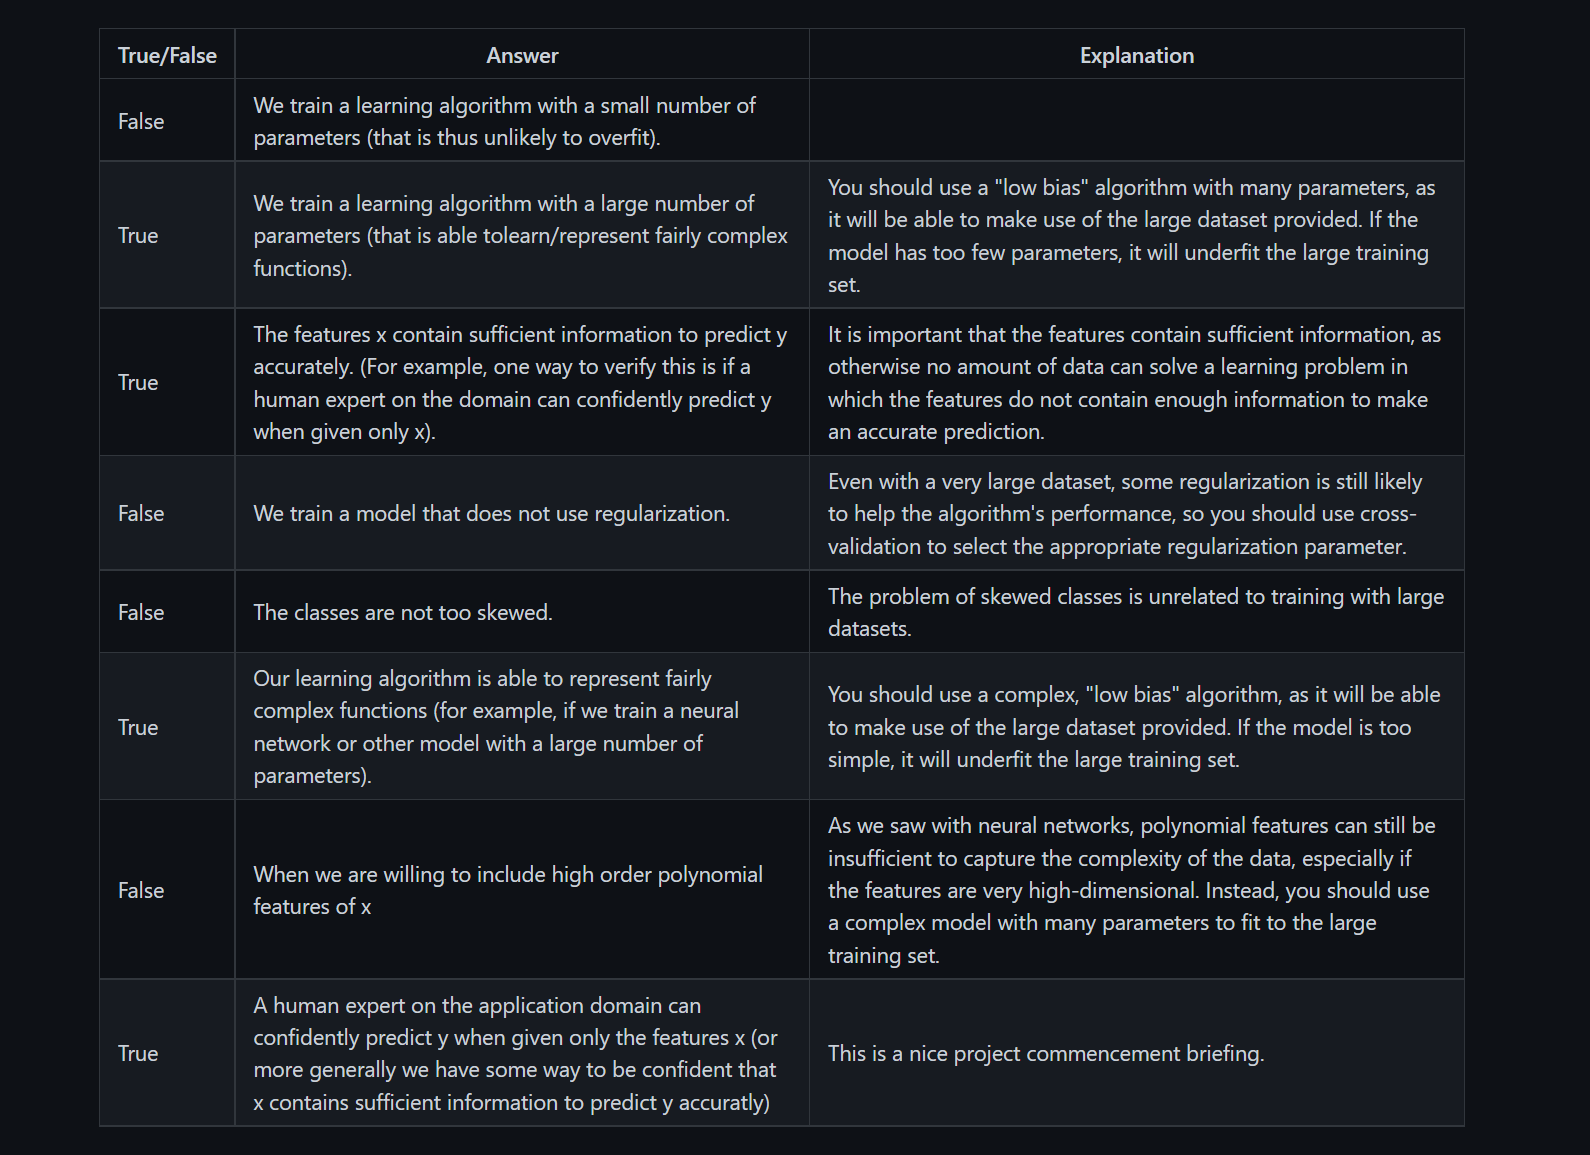

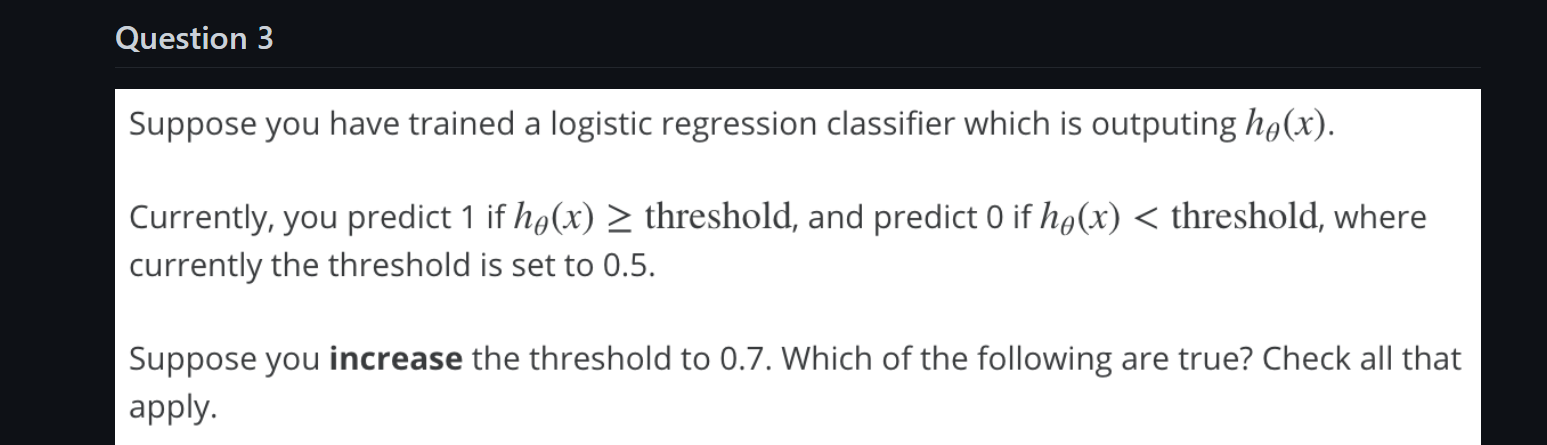

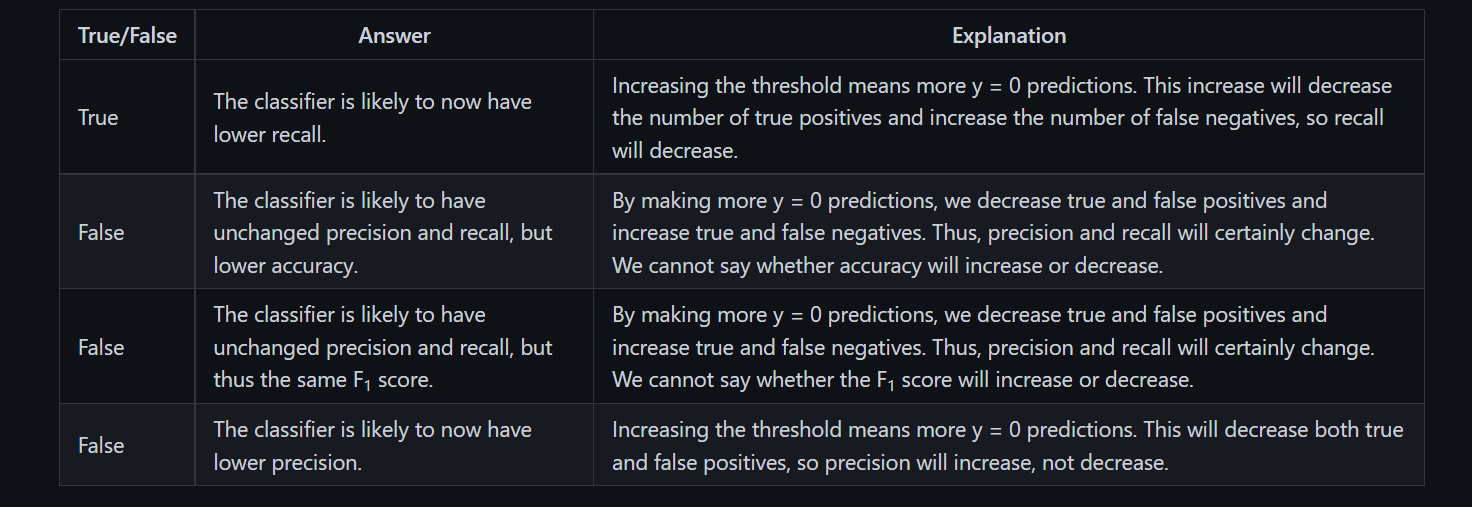

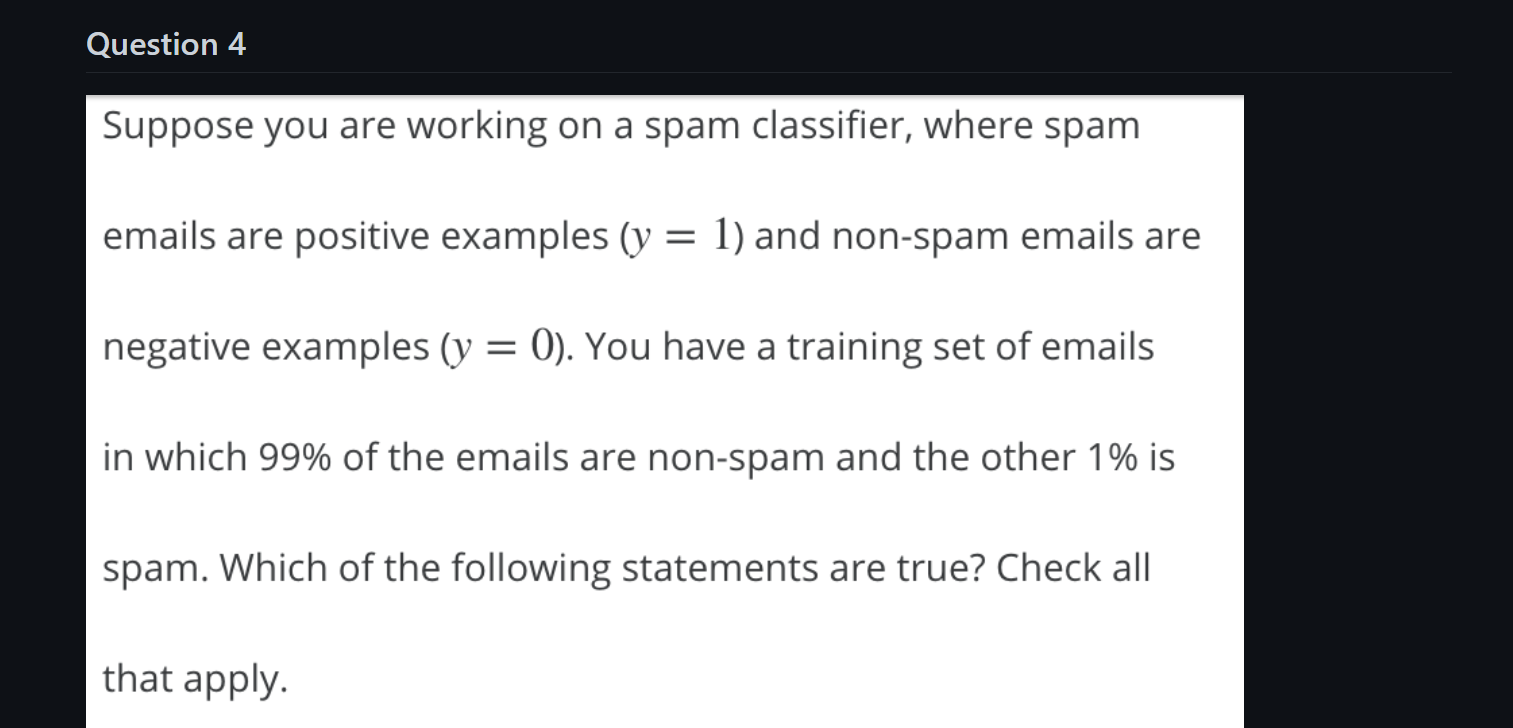

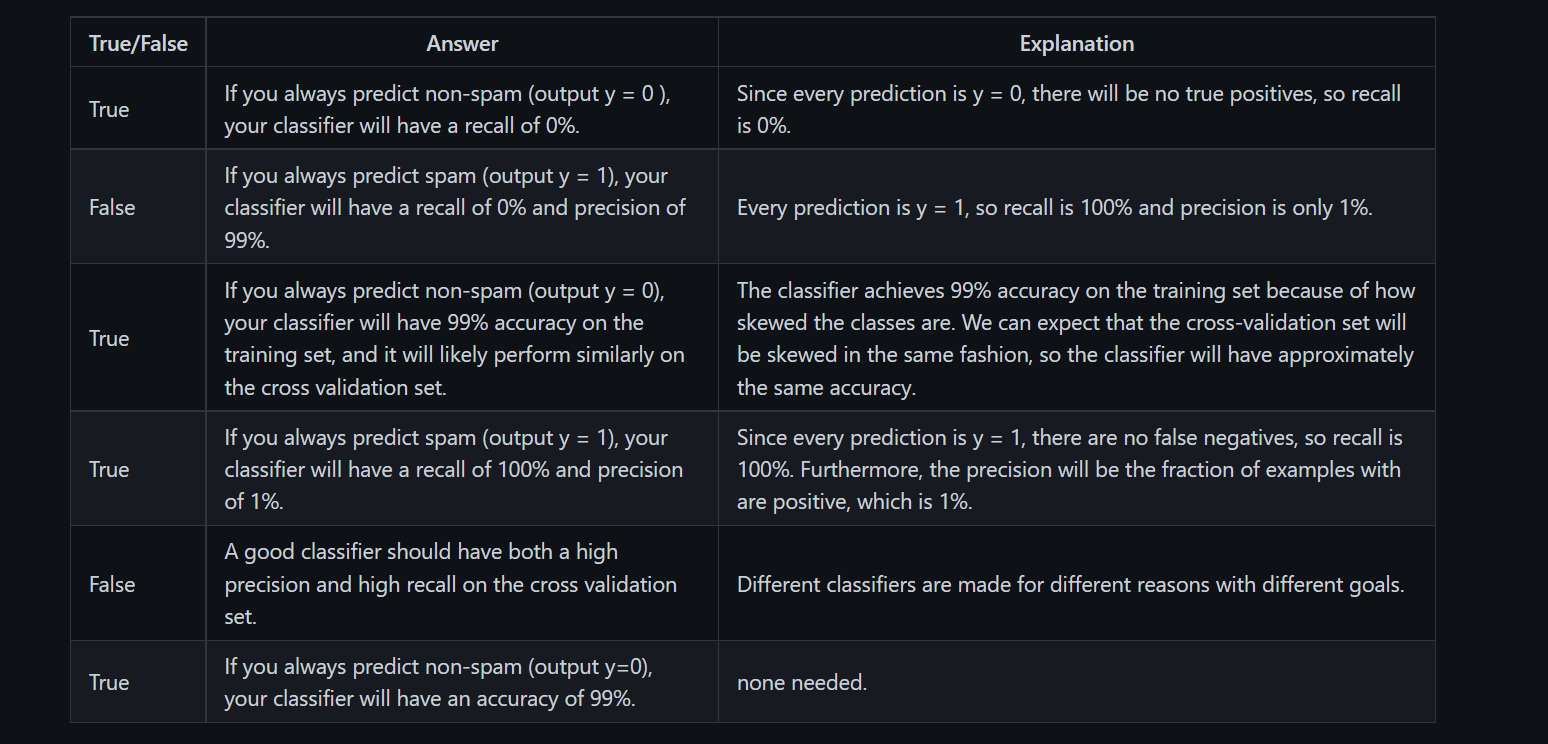

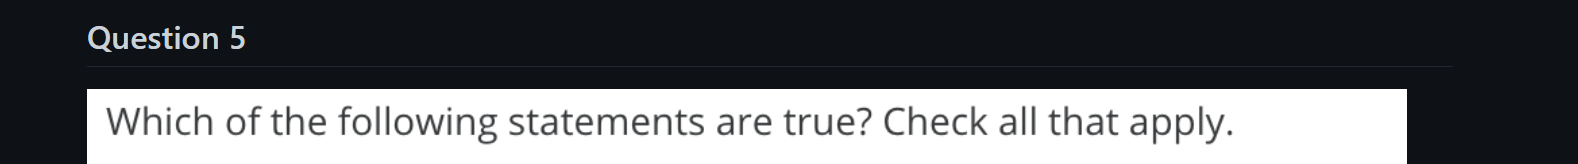

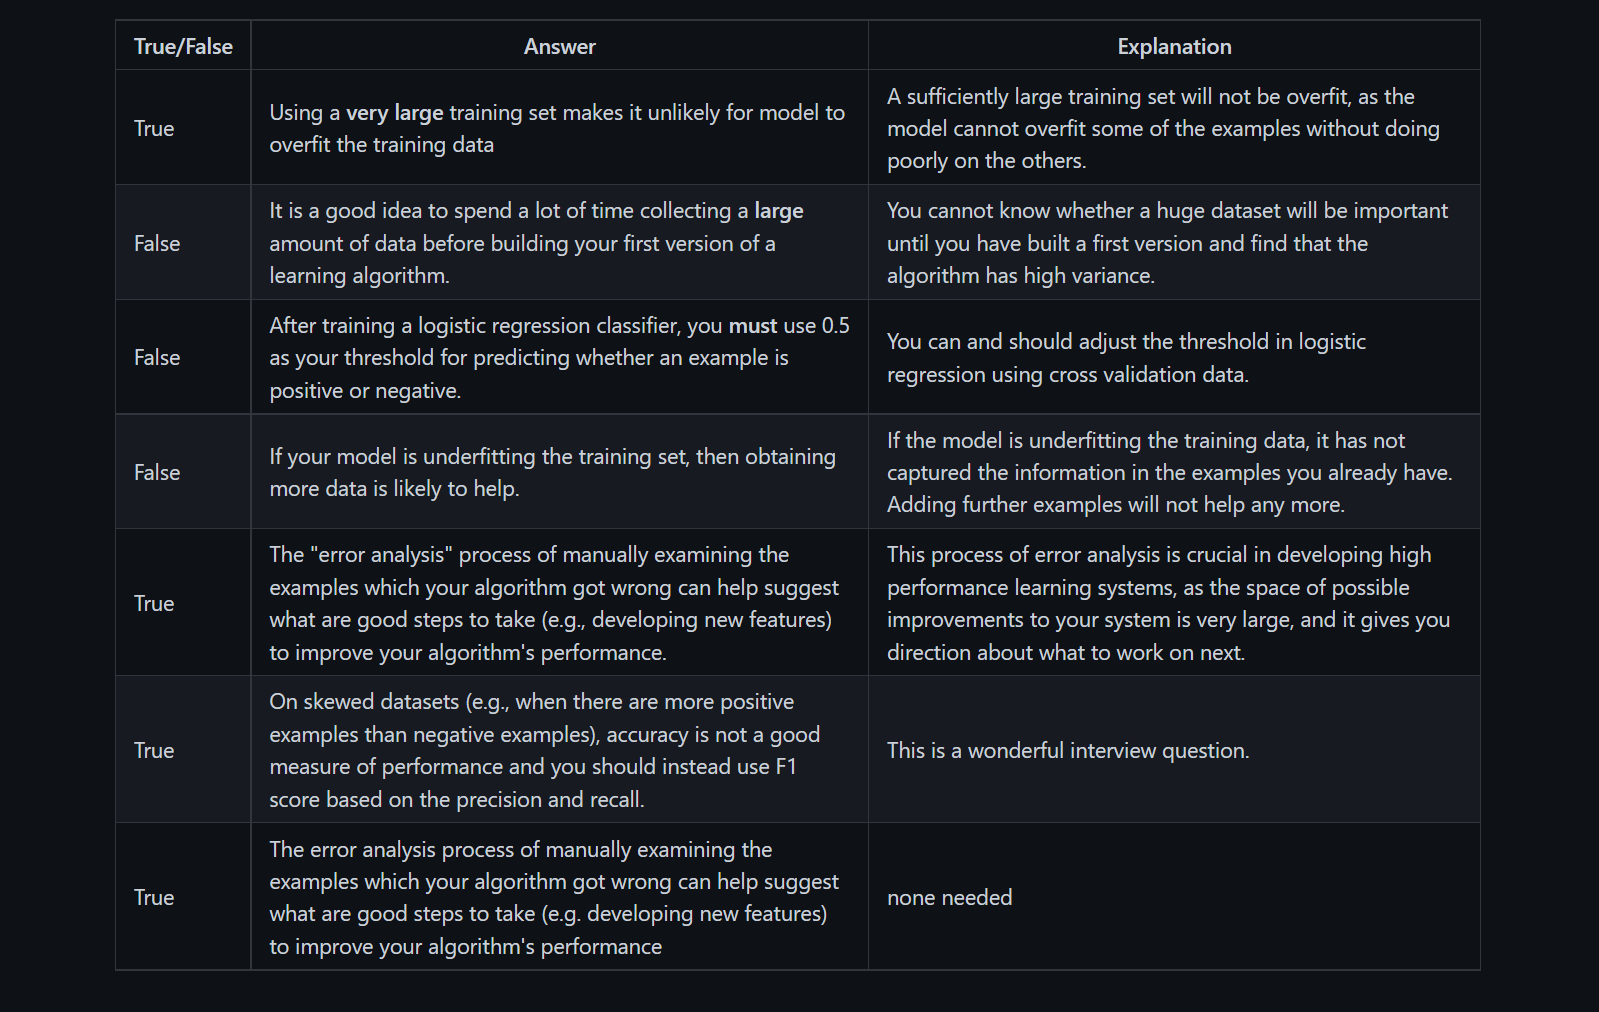